# Surprise Housing Assignment by M Tyagi

# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
The company is looking at prospective properties to buy to enter the market.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

# Business Goal 



You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Import Important libararies

In [2]:


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. Read, Understand & Clean Data

In [3]:
## Load train csv file
df = pd.read_csv('train.csv')

## View the first five rows
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [2652]:
df.shape

(1460, 81)

In [2653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2654]:
#describe data 

df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

# Handle Missing Data

In [2655]:
#check Missing values of columns
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [2656]:
#check the % of null values 

round(df.isnull().sum()/len(df.index)*100,2)


Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [2657]:
##Check the count of distinct values in columns with low non null values 

In [2658]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [2659]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [2660]:
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [2661]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Above 4 columns can be dropped as a have high % of null values 

In [2662]:
#Drop columns with maximum missing values
df = df.drop(columns=['PoolQC','Fence', 'MiscFeature','Alley'])

In [2663]:
##Handle missing values in other columns

In [2664]:
#describe LotFrontage
df['LotFrontage'].describe()



count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [2665]:
LotFrontage_median = df.LotFrontage.median()

In [2666]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
df.LotFrontage = df.LotFrontage.fillna(LotFrontage_median)


In [2667]:
#describe FireplaceQu
df['FireplaceQu'].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [2668]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [2669]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
df.FireplaceQu = df.FireplaceQu.fillna('NA')

In [2670]:
#MasVnrArea 

df['MasVnrArea'].value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [2671]:
#MasVnrArea 

df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [2672]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.median())    


In [2673]:
##MasVnrType

df['MasVnrType'].describe()


count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [2674]:
#MasVnrArea 

df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [2675]:
#replace Nan values of MasVnrType with None i.e. No Masonary type
df.MasVnrType = df.MasVnrType.fillna('None')

In [2676]:
#BsmtQual

df['BsmtQual'].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [2677]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [2678]:
#replace Nan values of BsmtQual with NA i.e. No Basement
df.BsmtQual = df.BsmtQual.fillna('NA')

In [2679]:
#BsmtCond

df['BsmtCond'].describe()



count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [2680]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [2681]:
#replace Nan values of BsmtCond with NA i.e. No Basement
df.BsmtCond = df.BsmtCond.fillna('NA')

In [2682]:
#BsmtExposure

df['BsmtExposure'].describe()



count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

In [2683]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [2684]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
df.BsmtExposure = df.BsmtExposure.fillna('No')

In [2685]:
#Replacing values of other columns based on the describe 


#replace Nan values of BsmtFinType1 with NA i.e. No Basement
df.BsmtFinType1 = df.BsmtFinType1.fillna('NA')


#replace Nan values of BsmtFinType2 with NA i.e. No Basement
df.BsmtFinType2 = df.BsmtFinType2.fillna('NA')


#impute missing values of Electrical with mode due to categorical column
df.Electrical = df.Electrical.fillna(df.Electrical.mode()[0])    


#replace Nan values of GarageType with NA i.e. No Garage
df.GarageType = df.GarageType.fillna('NA')

#replace Nan values of GarageYrBlt with 0 i.e. No Garage
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

#replace Nan values of GarageFinish with NA i.e. No Garage
df.GarageFinish = df.GarageFinish.fillna('NA')

#replace Nan values of GarageQual with NA i.e. No Garage
df.GarageQual = df.GarageQual.fillna('NA')

#replace Nan values of GarageCond with NA i.e. No Garage
df.GarageCond = df.GarageCond.fillna('NA')





In [2686]:
#check missing values again
#check the % of null values 

round(df.isnull().sum()/len(df.index)*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [2687]:
#check if there are any NaN values 

round(df.isna().sum()/len(df.index)*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

So, all missing values have been handled 

# Handling data values and types

In [2688]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
df['HouseAge'] = df.YrSold - df.YearBuilt

#Drop YrSold, YearBuilt after HouseAge
df=df.drop(columns=['YrSold', 'YearBuilt'])


In [2689]:
#Mapping column values to Numeric

In [2690]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
df = df.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
df = df.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
df = df.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
df = df.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})


In [2691]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual ExterCond Foundation  BsmtQual BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold SaleType SaleCondition  SalePrice  HouseAge
0   1          60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0          4        TA      PConc         4       TA             1             6         706          Unf           0        150          856    GasA          5          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1            4             8        Typ           0            0     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0        0       2       WD        Normal     208500         5
1   2          20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0          3        TA     CBlock         4       TA             4             5         978          Unf           0        284         1262    GasA          5          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1            3             6        Typ           1            3     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0        0       5       WD        Normal     181500        31
2   3          60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0          4        TA      PConc         4       TA             2             6         486          Unf           0        434          920    GasA          5          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1            4             6        Typ           1            3     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0        0       9       WD        Normal     223500         7
3   4          70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0          3        TA     BrkTil         3       Gd             1             5         216          Unf           0        540          756    GasA          4          Y      SBrkr       961       756             0       1717             1             0         1         0             3

In [2692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [2693]:
df.shape

(1460, 76)

# 2. Exploratory Data Anlysis

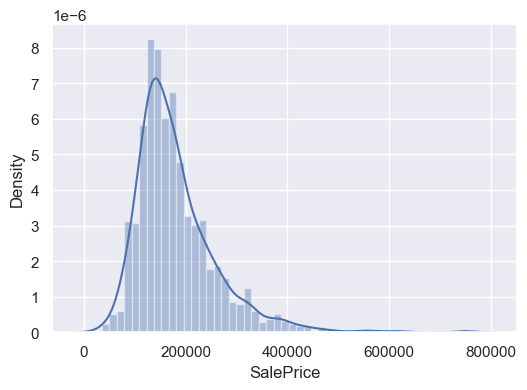

In [2694]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[6,4])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

The target variable in right skewed

In [2695]:
## Divide the dataframe df into numerical and categorical columns for EDA

## Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge
0   1          60         65.0     8450            7            5          2003       196.0          4         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0            0       2003.0           2         548           0           61              0          0            0         0        0       2     208500         5
1   2          20         80.0     9600            6            8          1976         0.0          3         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1            3       1976.0           2         460         298            0              0          0            0         0        0       5     181500        31
2   3          60         68.0    11250            7            5          2002       162.0          4         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1            3       2001.0           2         608           0           42              0          0            0         0        0       9     223500         7
3   4          70         60.0     9550            7            5          1970         0.0          3         3             1             5         216           0        540          756          4       961       756             0       1717             1             0         1         0             3             1            4             7           1            4       1998.0           3         642           0           35            272          0            0         0        0       2     140000        91
4   5          60         84.0    14260            8            5          2000       350.0          4         4             3             6         655           0        490         1145          5      1145      1053             0       2198             1             0         2         1             4             1            4             9           1            3       2000.0           3         836         192           84              0          0            0         0        0      12     250000         8

In [2696]:
## Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterCond Foundation BsmtCond BsmtFinType2 Heating CentralAir Electrical Functional GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        TA      PConc       TA          Unf    GasA          Y      SBrkr        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd       None        TA     CBlock       TA          Unf    GasA          Y      SBrkr        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        TA      PConc       TA          Unf    GasA          Y      SBrkr        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng       None        TA     BrkTil       Gd          Unf    GasA          Y      SBrkr        Typ     Detchd          Unf         TA         TA          Y       WD       Abnorml
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        TA      PConc       TA          Unf    GasA          Y      SBrkr        Typ     Attchd          RFn         TA         TA          Y       WD        Normal

# EDA on Numeric Columns

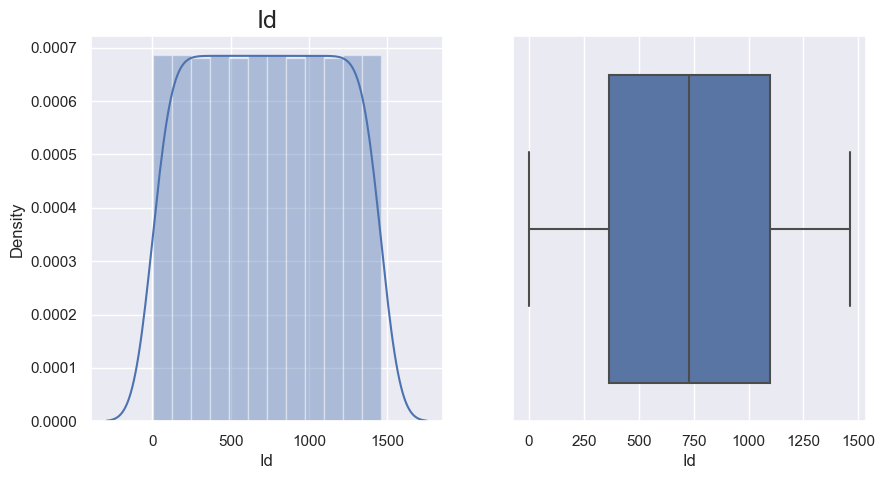

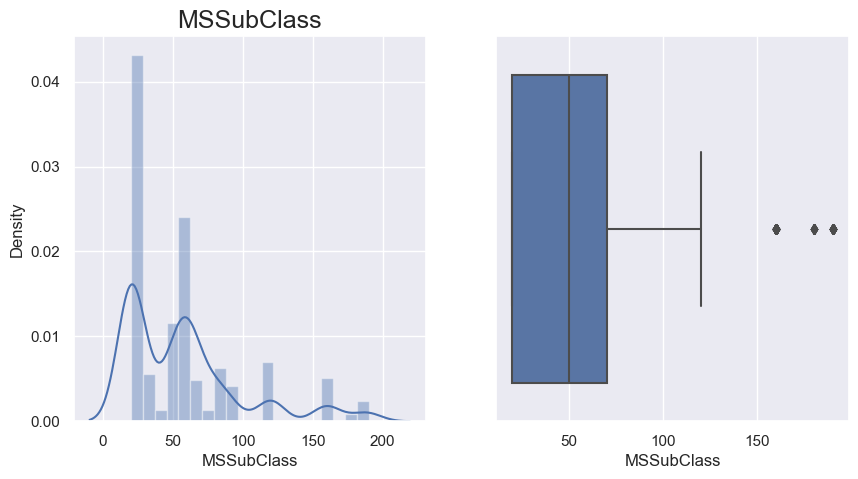

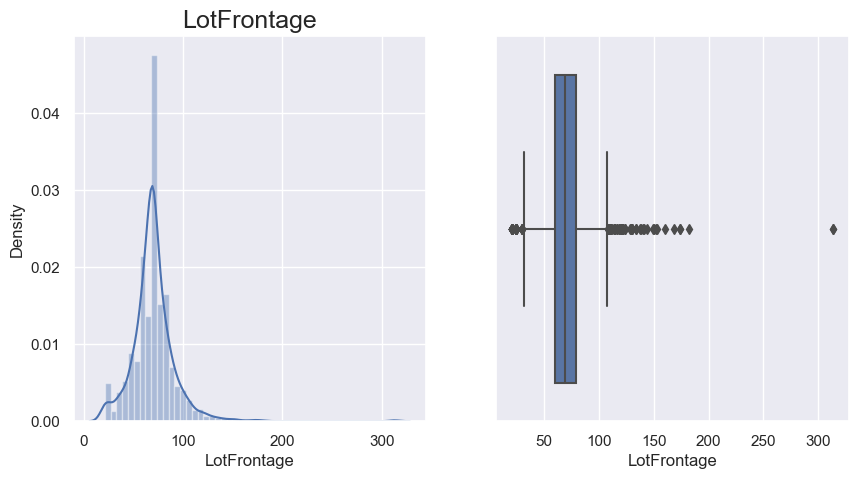

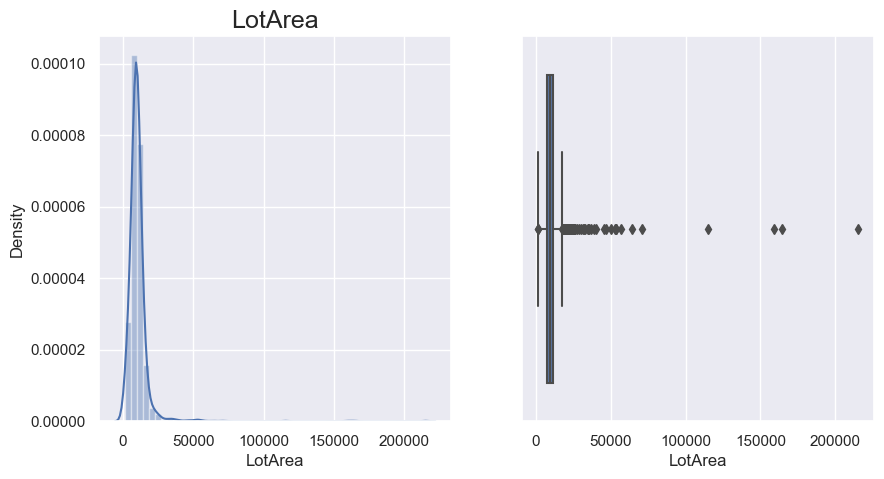

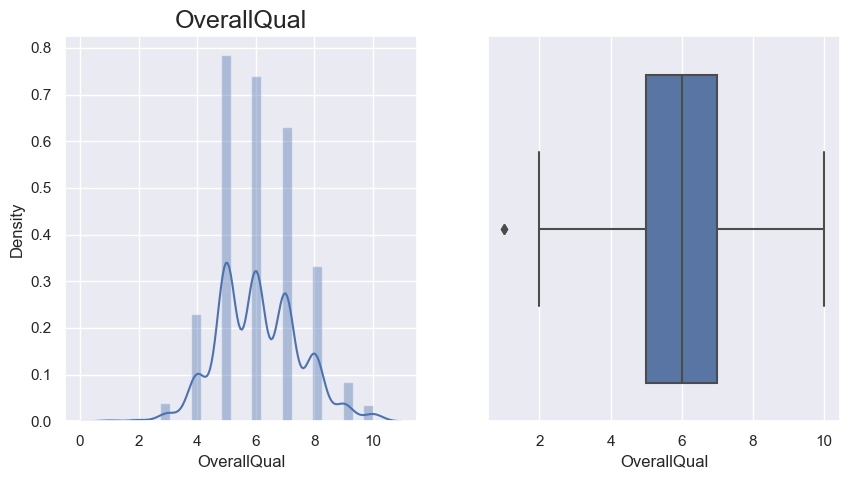

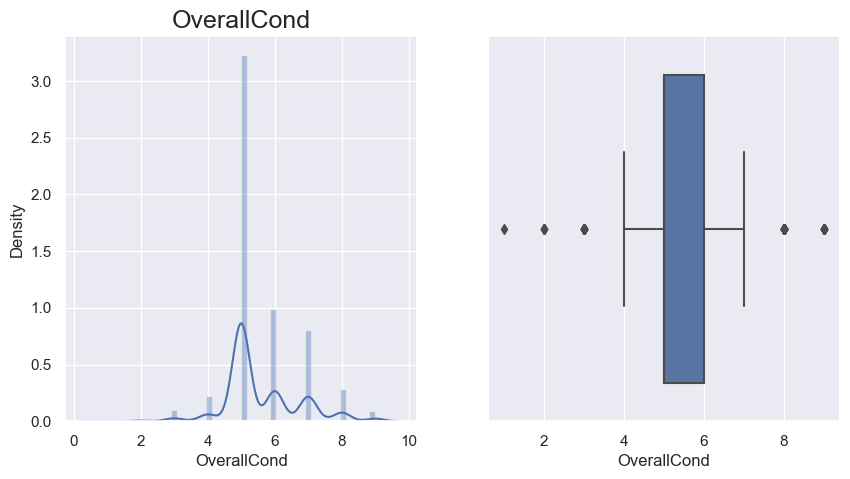

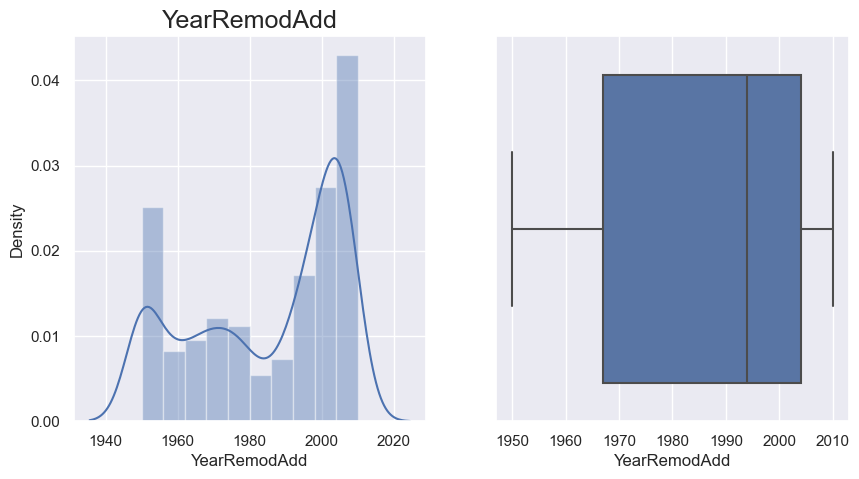

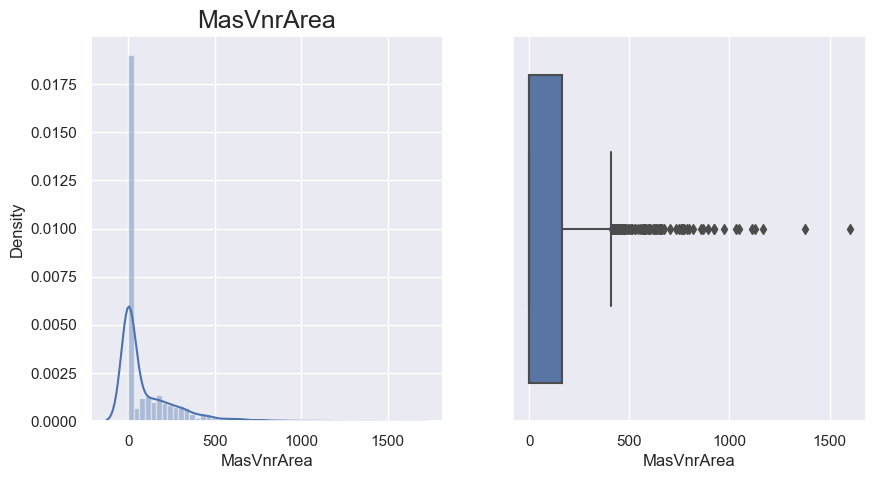

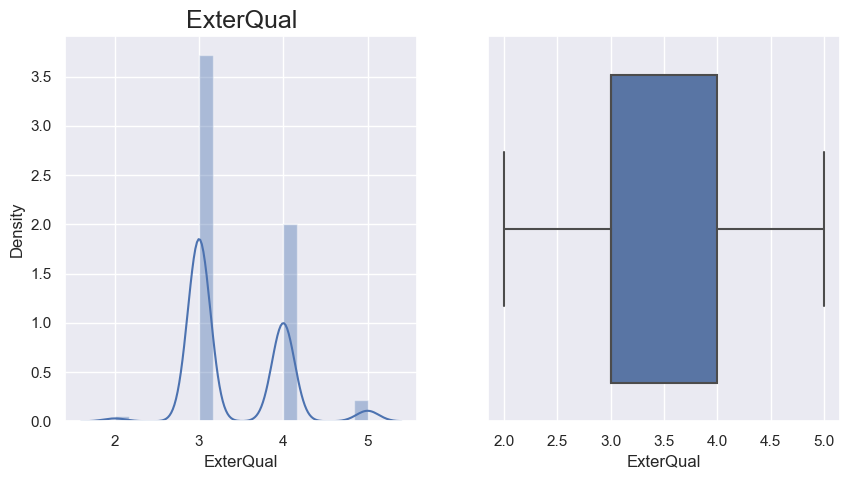

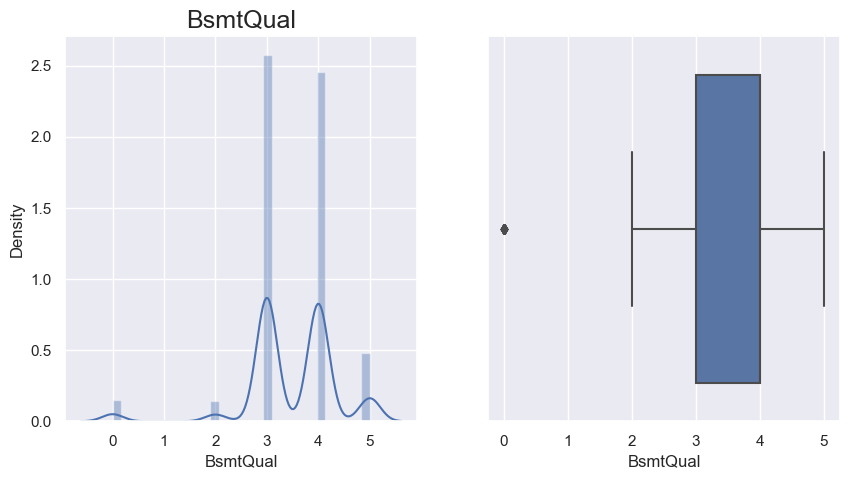

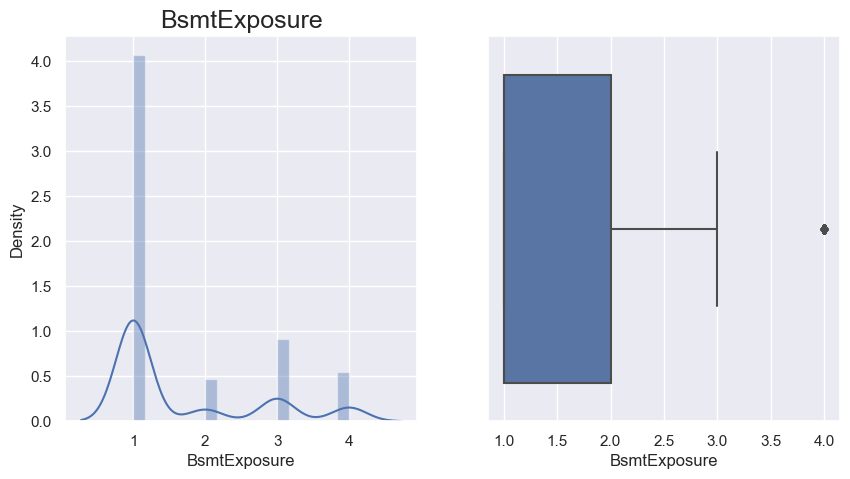

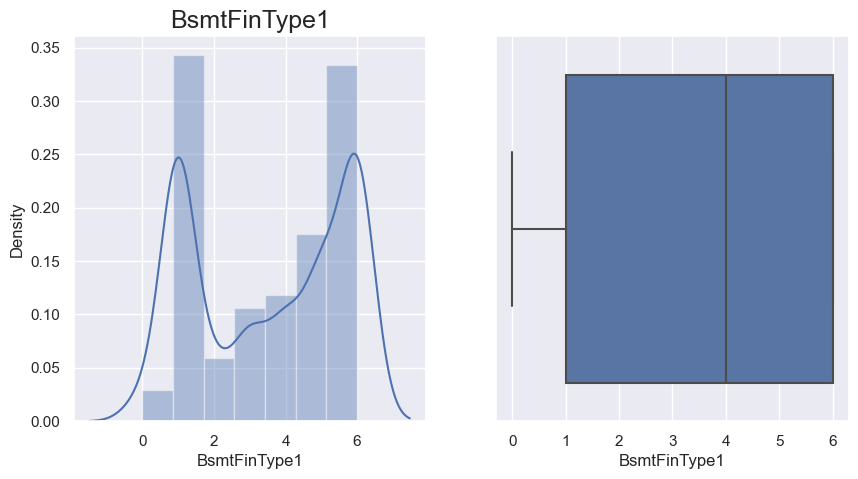

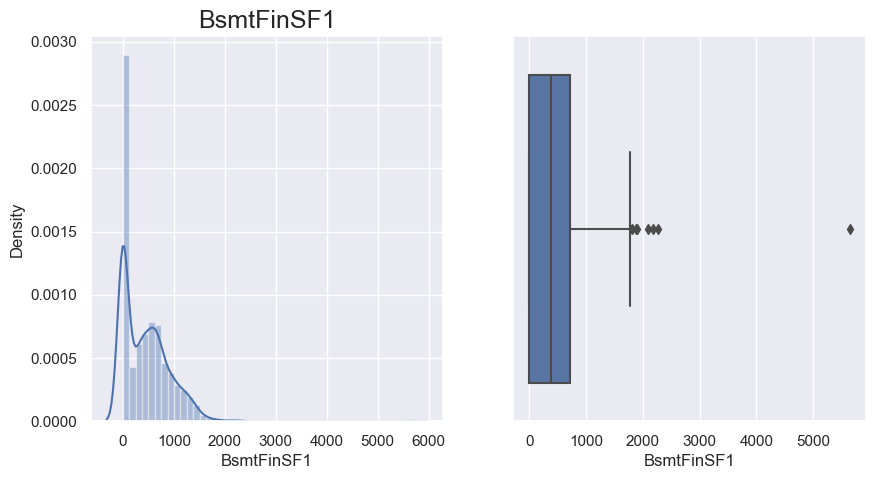

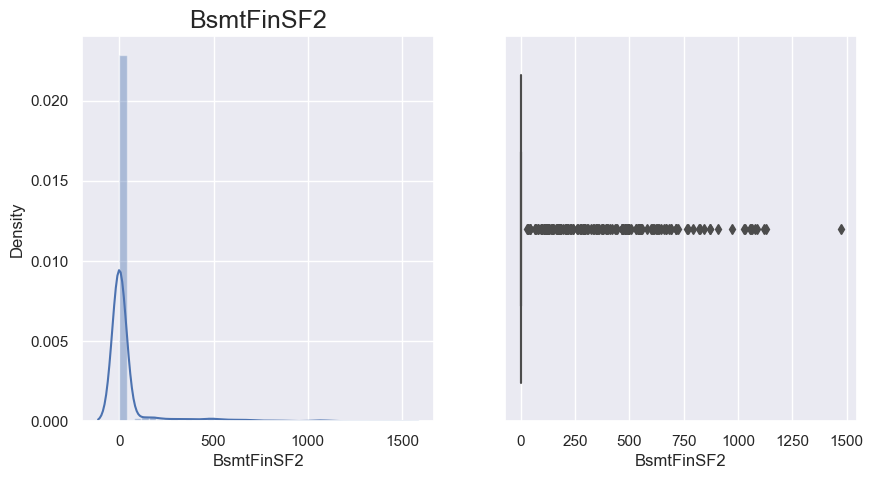

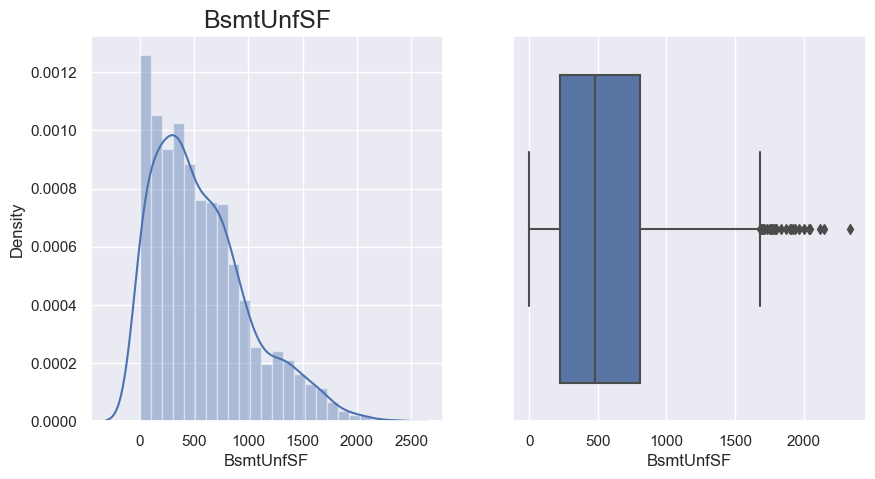

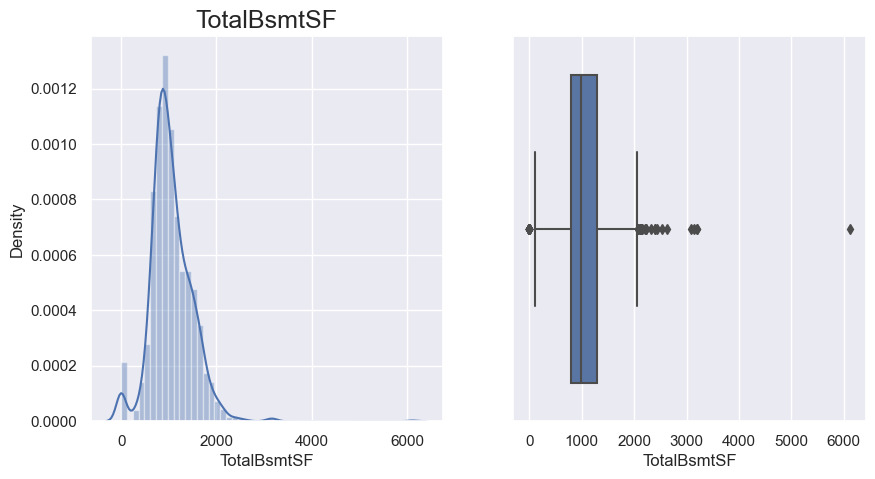

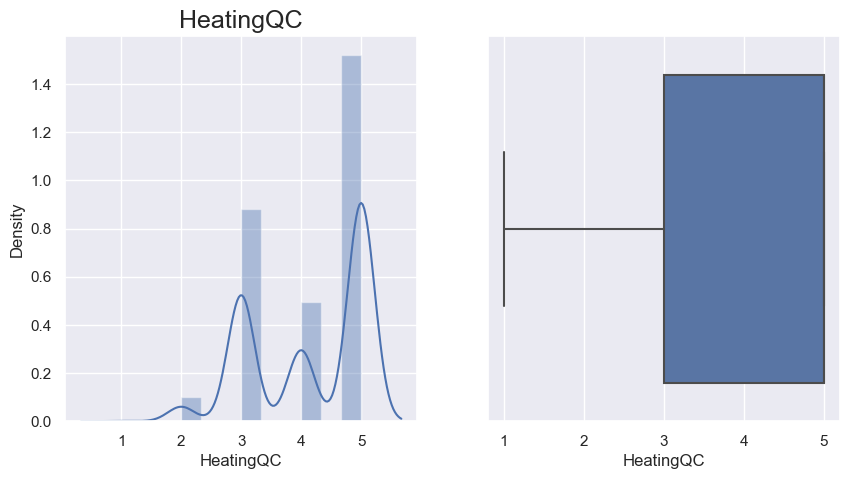

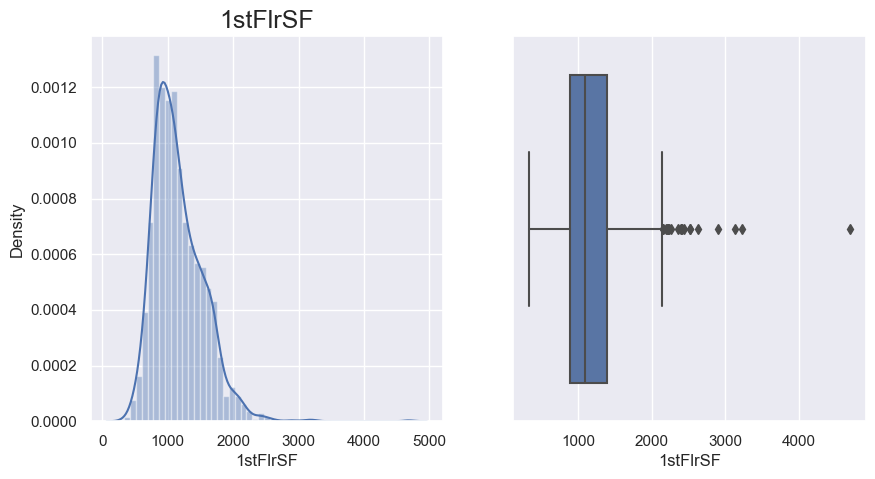

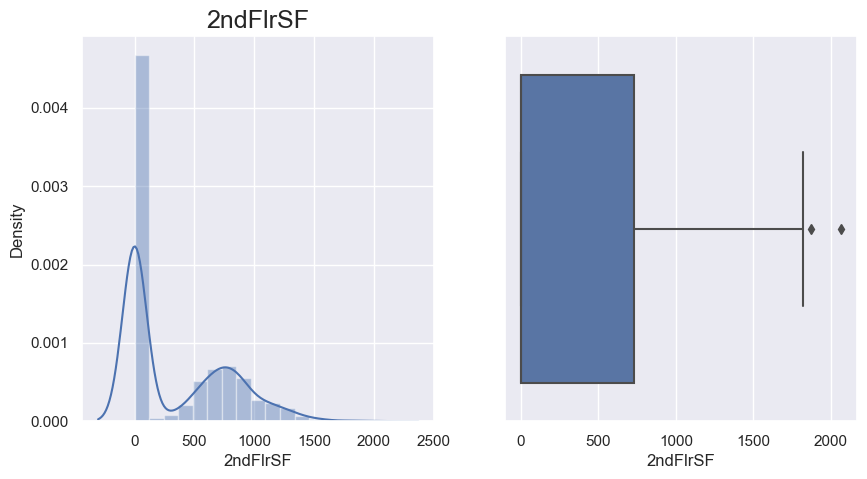

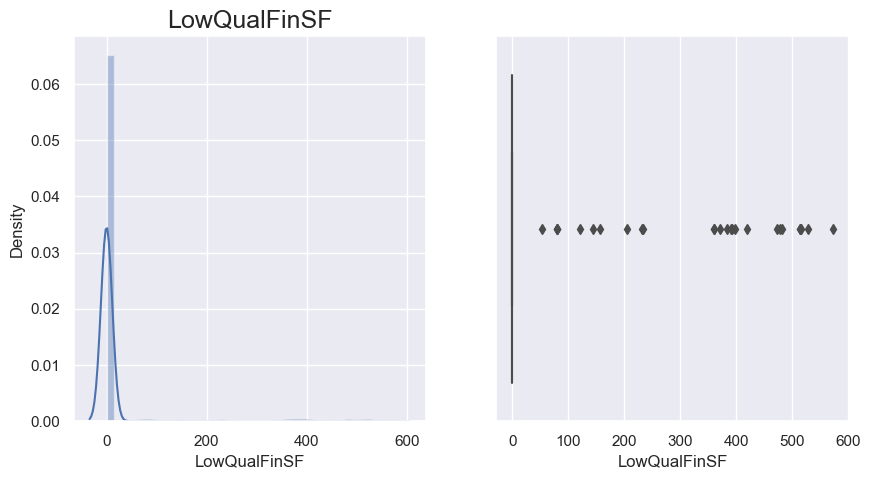

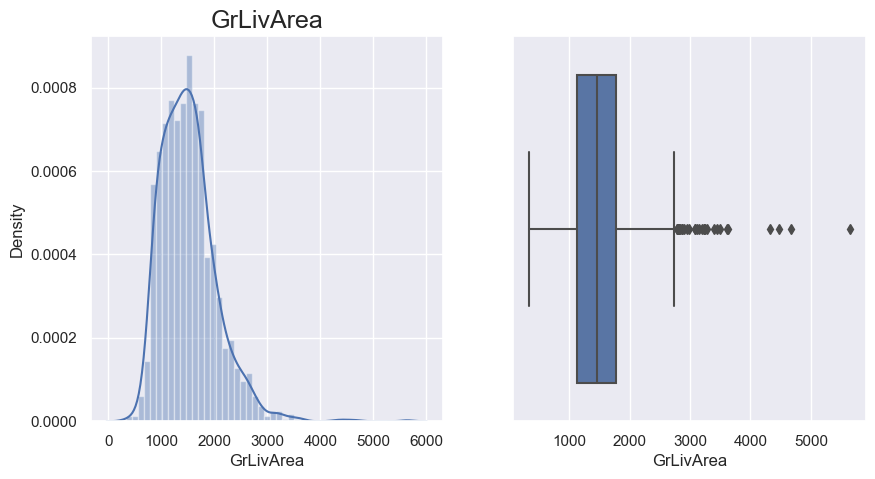

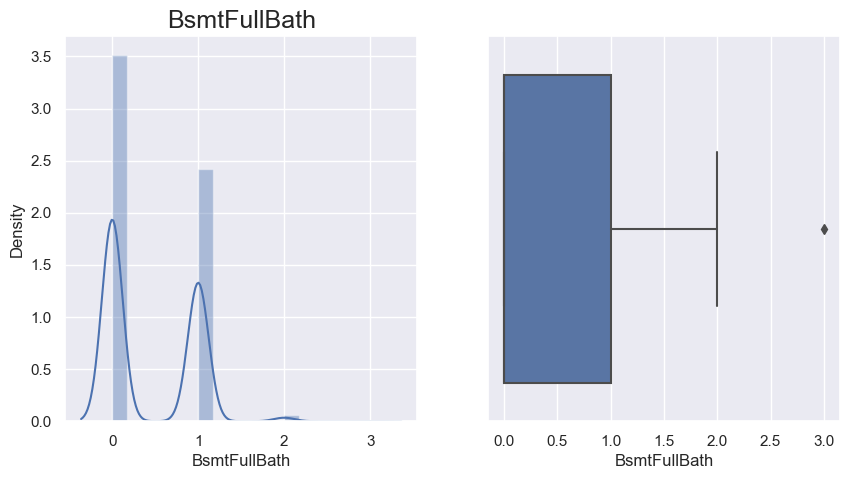

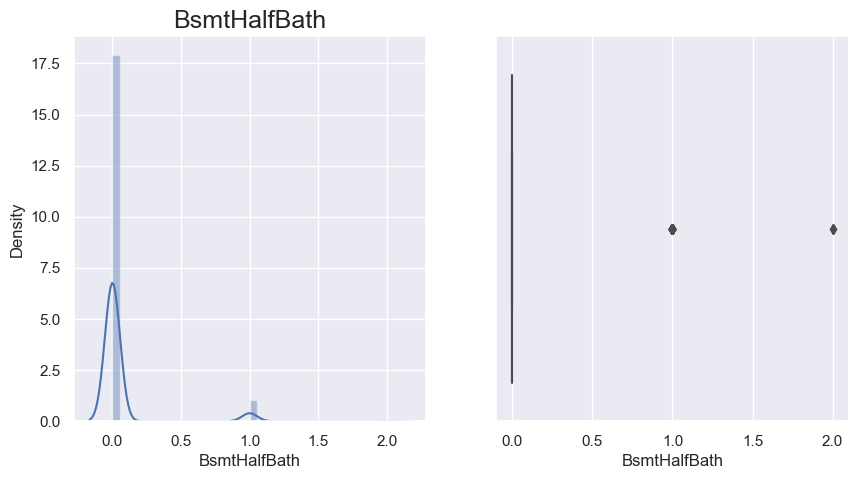

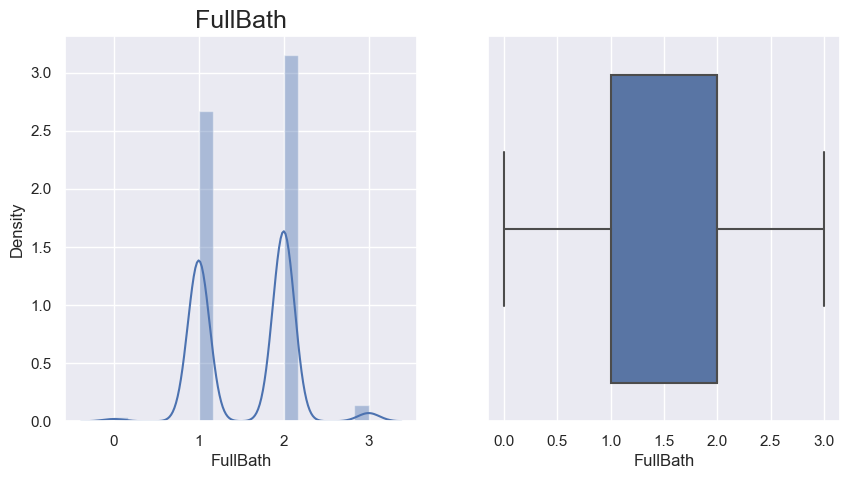

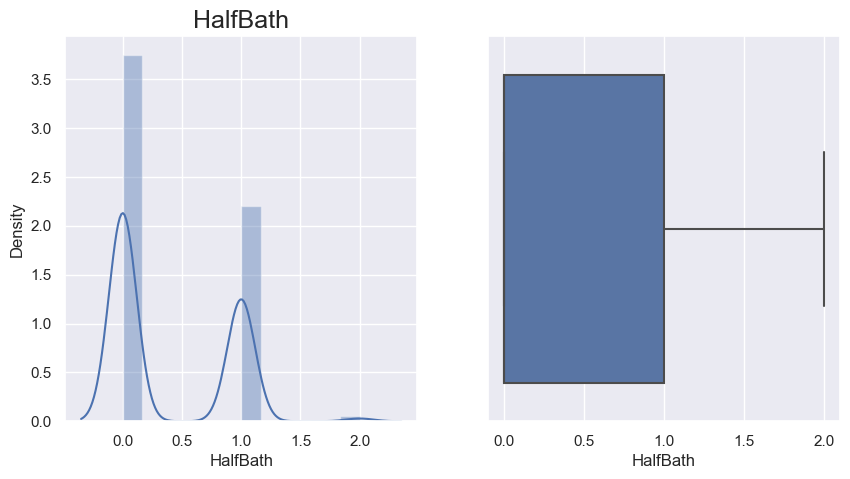

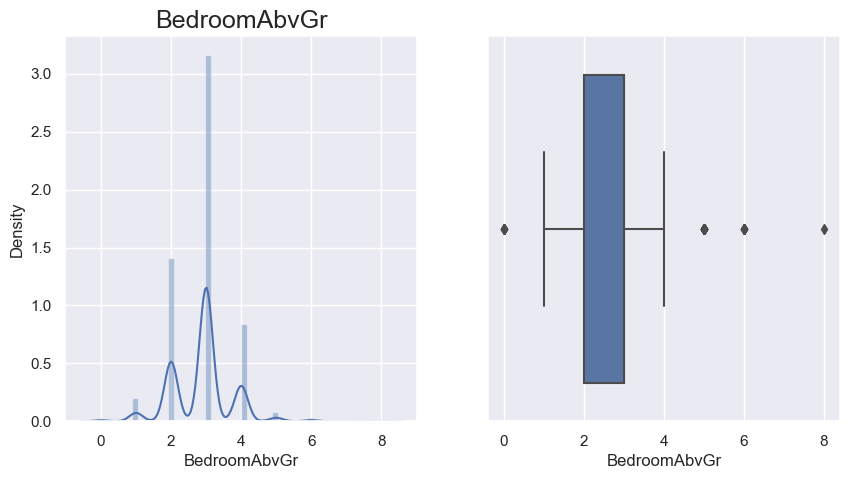

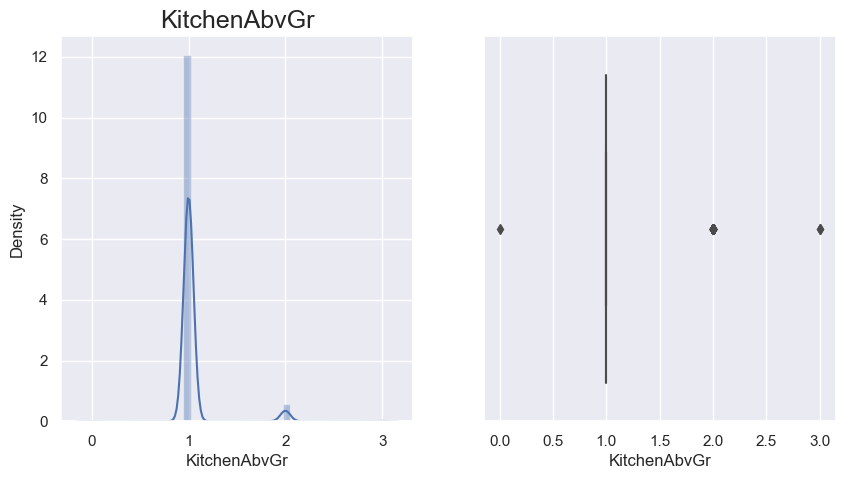

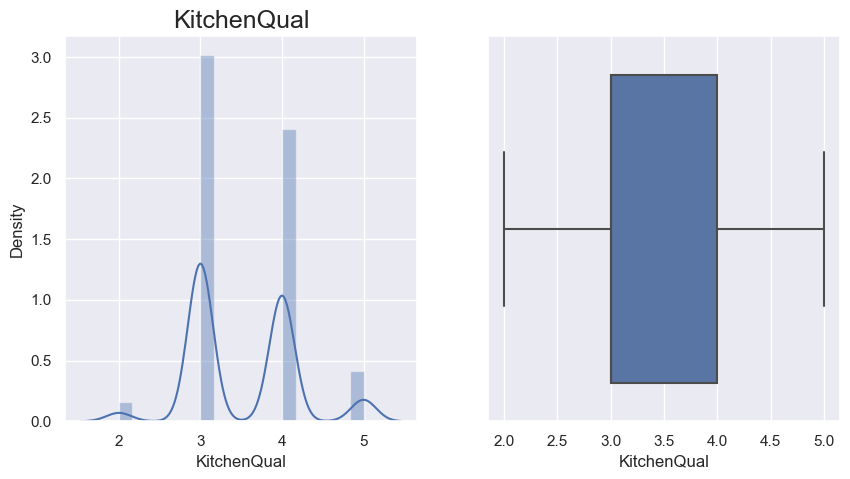

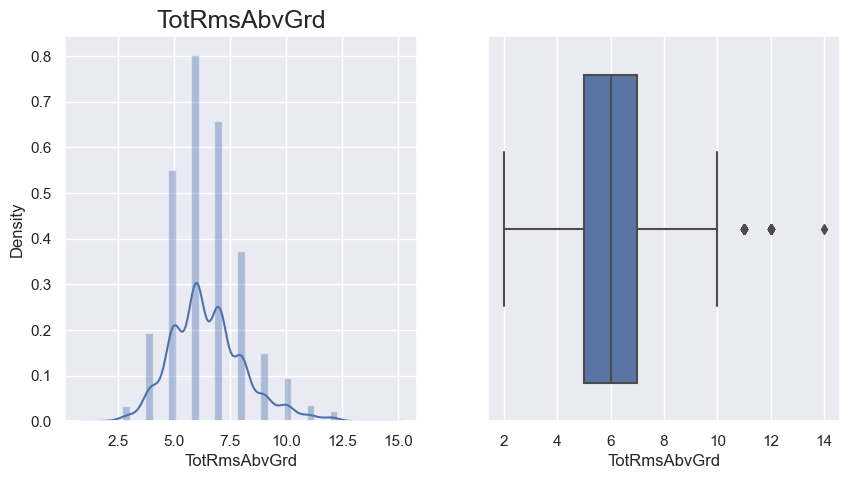

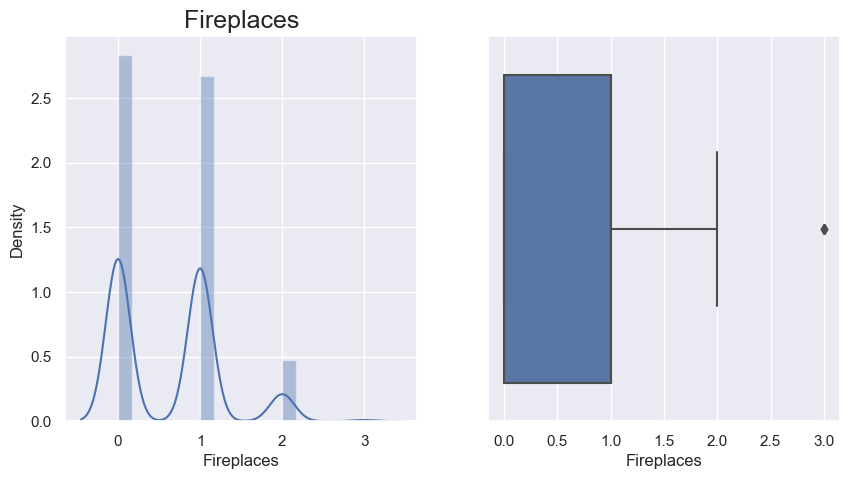

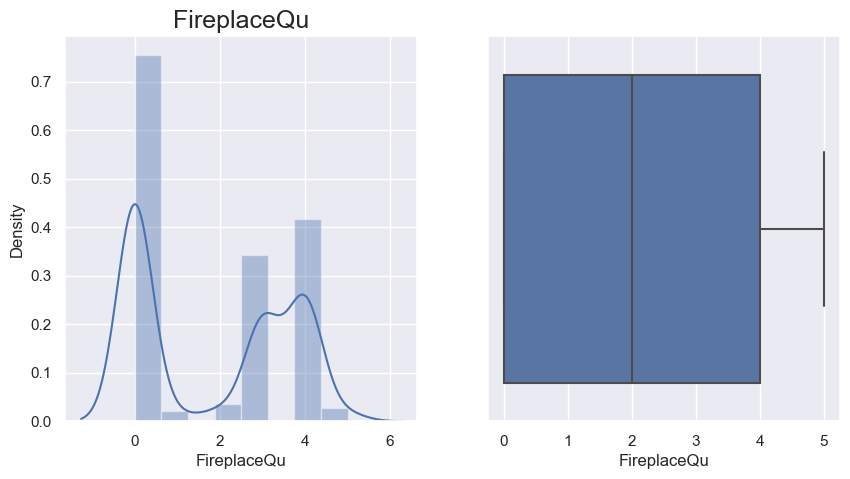

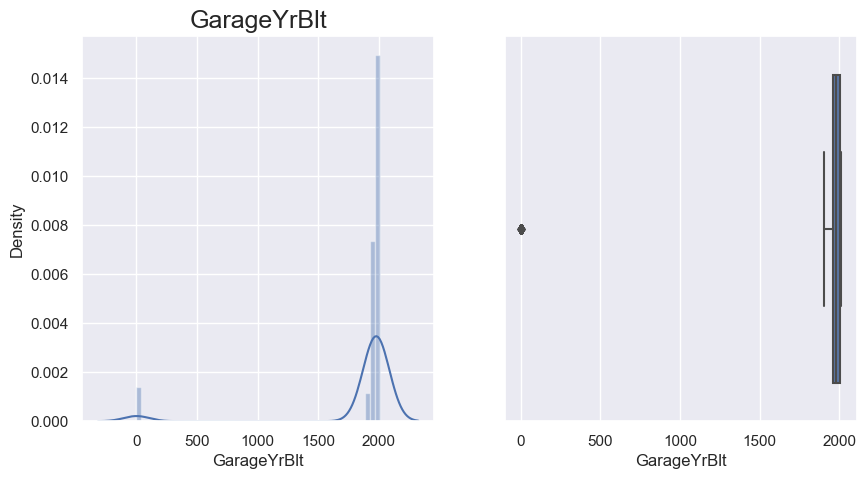

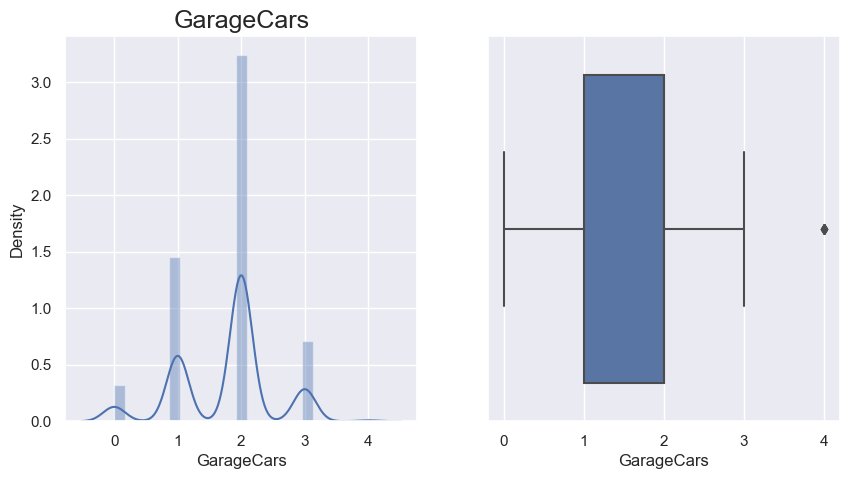

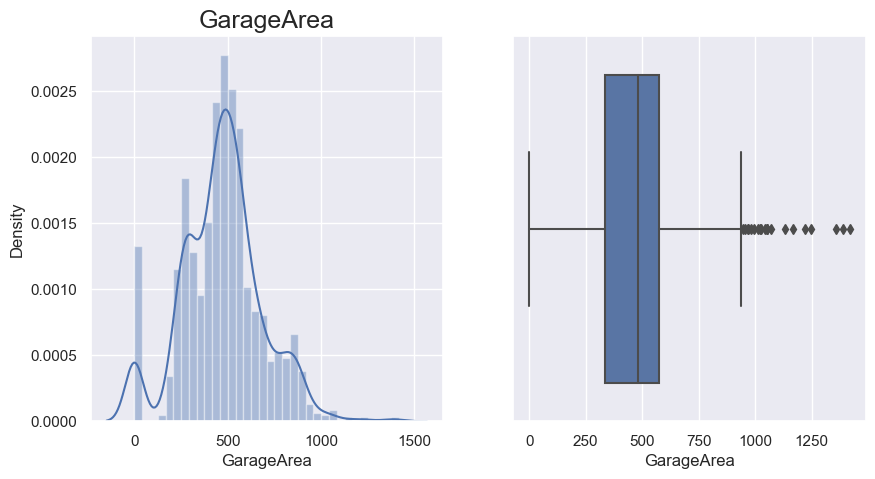

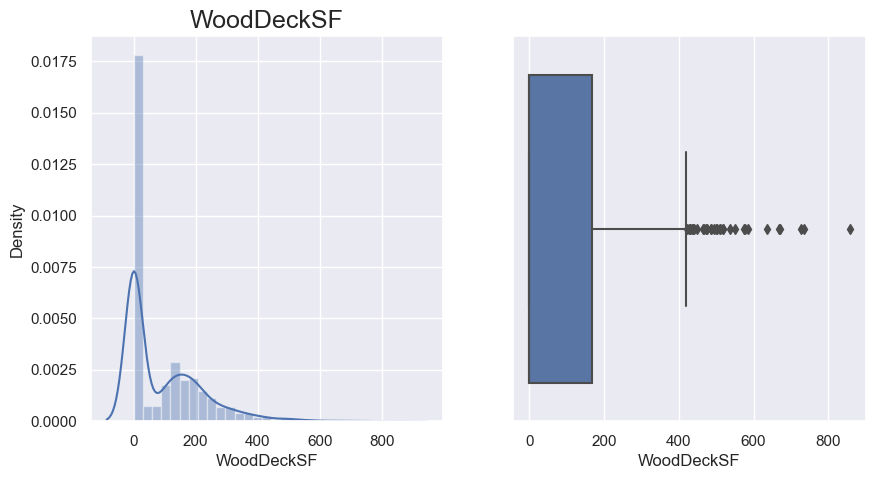

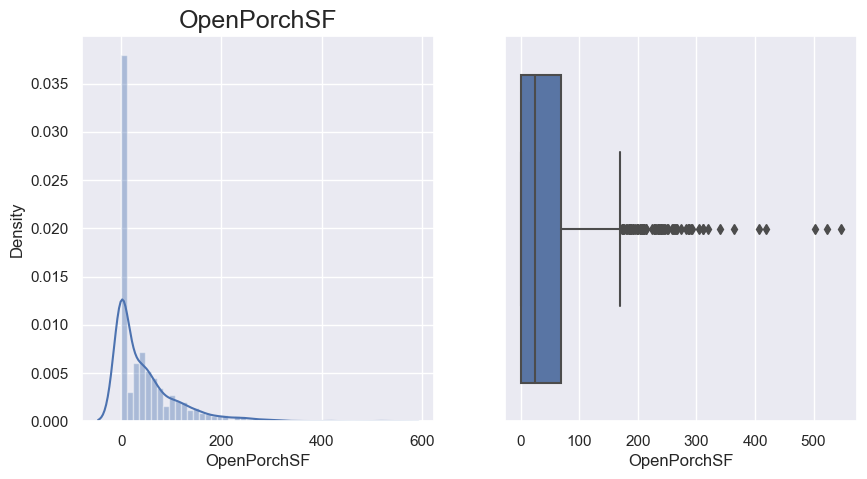

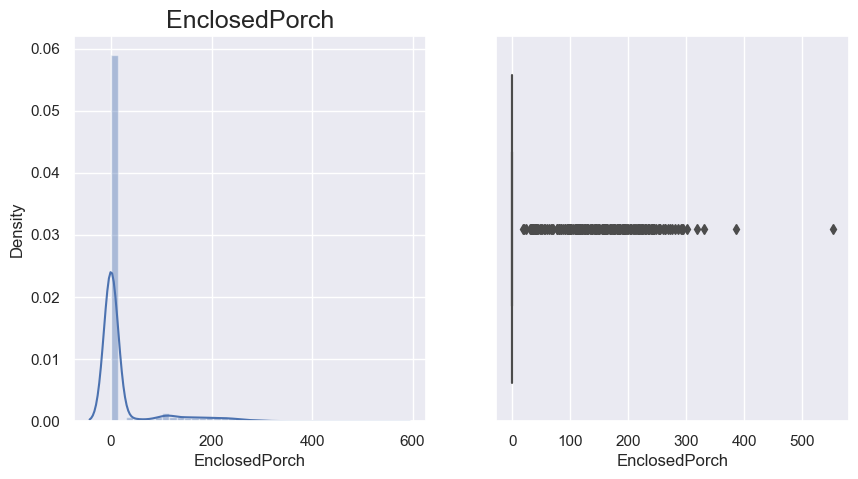

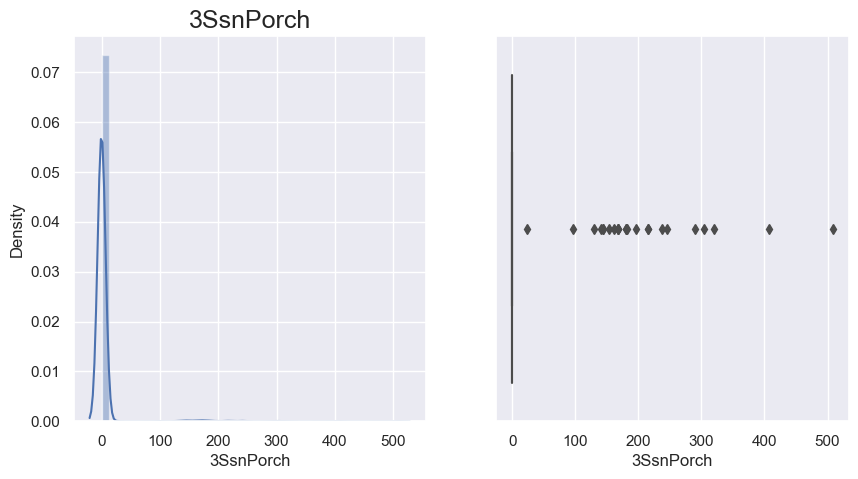

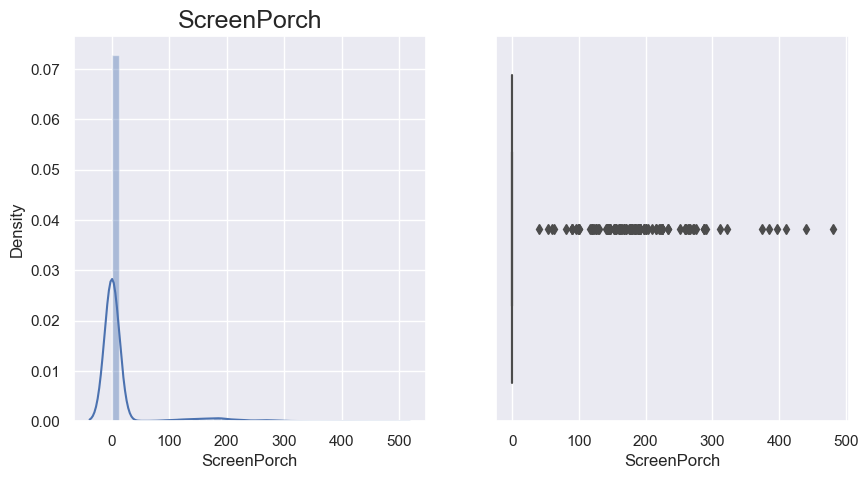

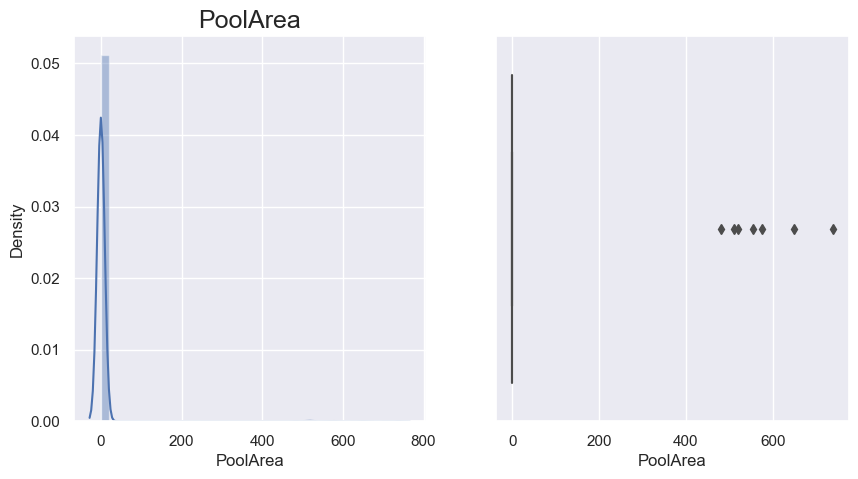

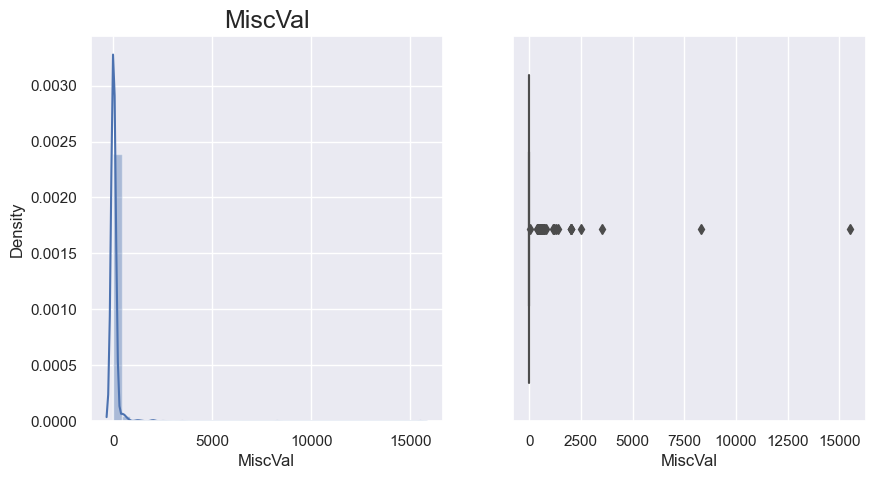

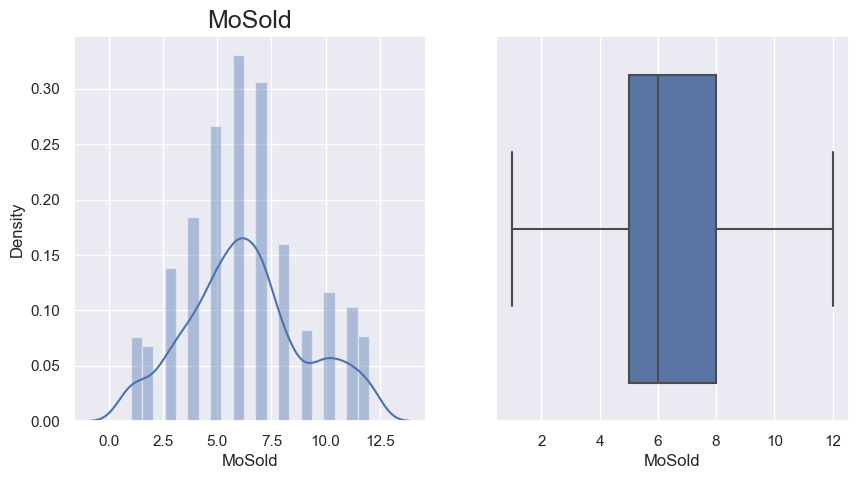

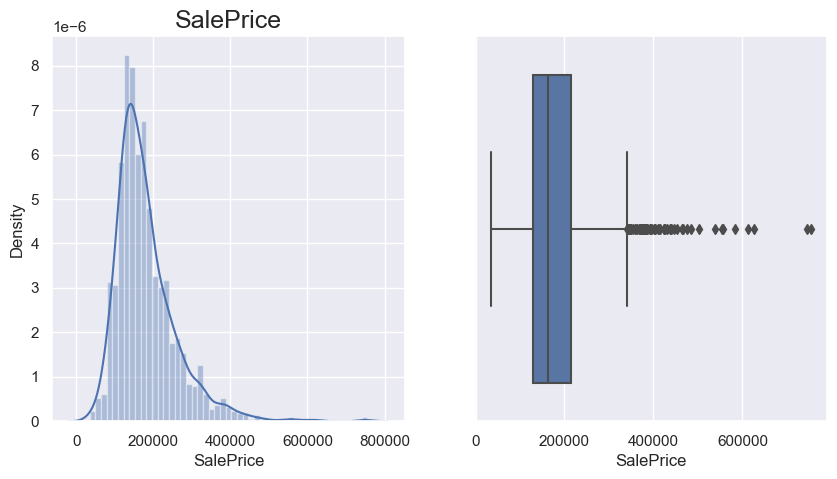

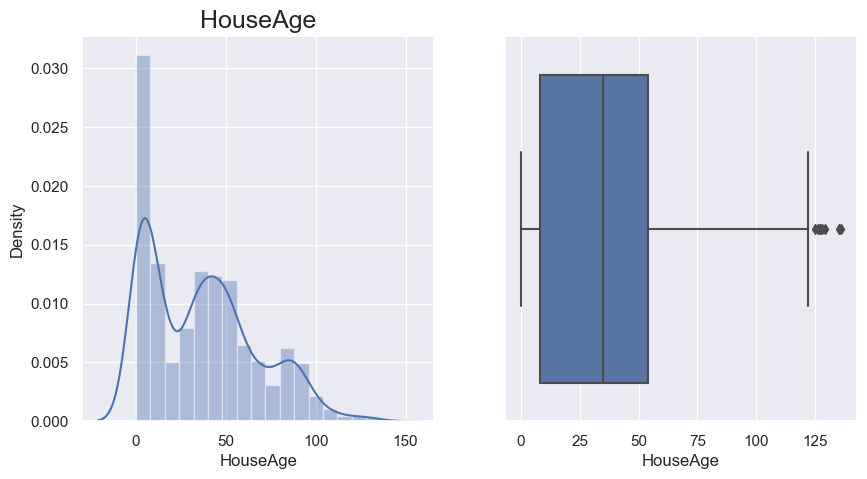

In [2697]:
## View the distribution of all numeric variables using histograms and boxplots

for col in df_num.columns:
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()  

Many of the numerical columns are having non-normal distribution.

Most of the columns have outliers. So, we will require to do Outlier treatment.

# EDA on Categorical Columns

In [2698]:
## View the unique values of all Categorical columns
for col in df_cat.columns:
    print(col)
    print(df[col].unique(), '\n')

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 

Exterior1st
['VinylSd' 'MetalS

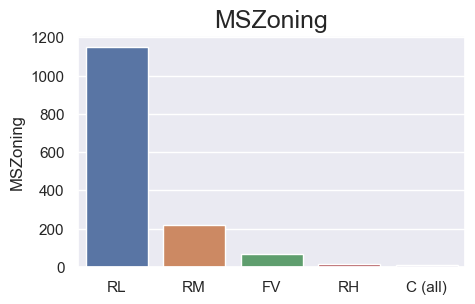

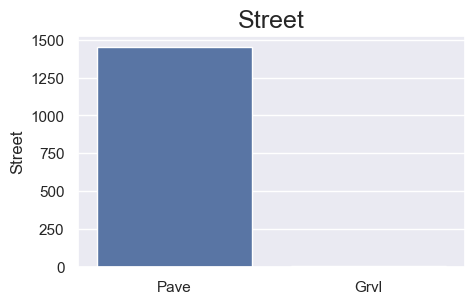

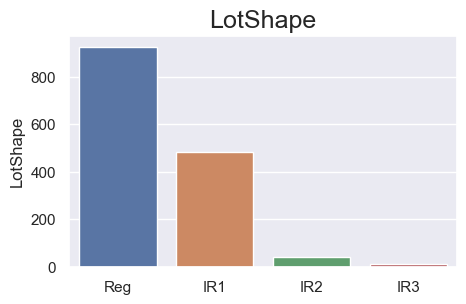

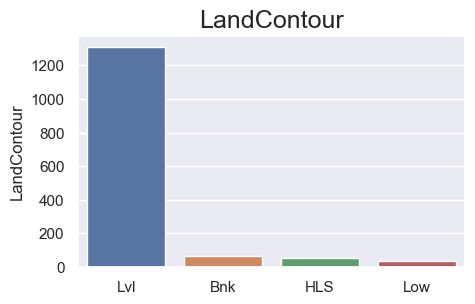

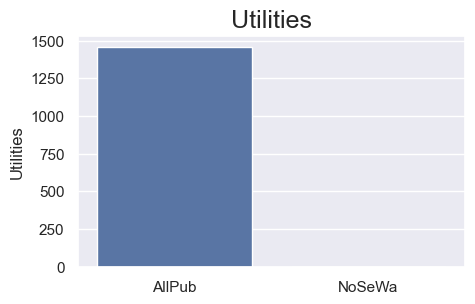

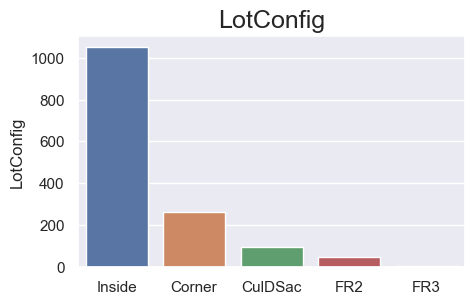

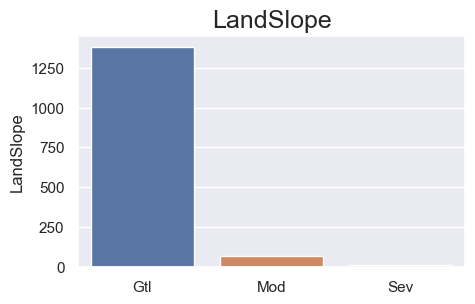

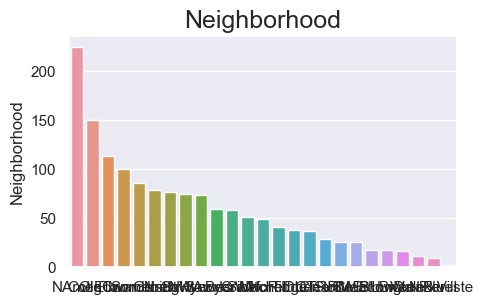

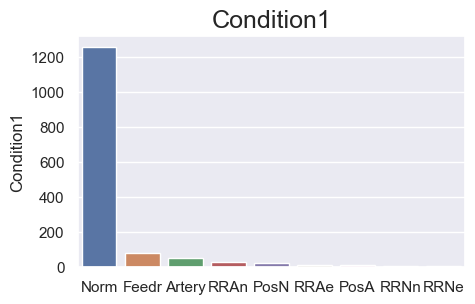

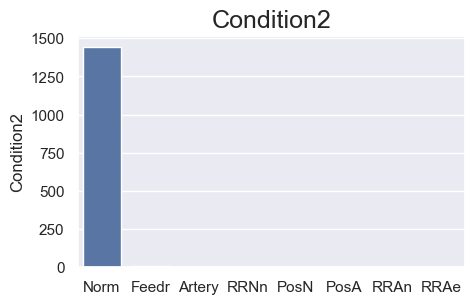

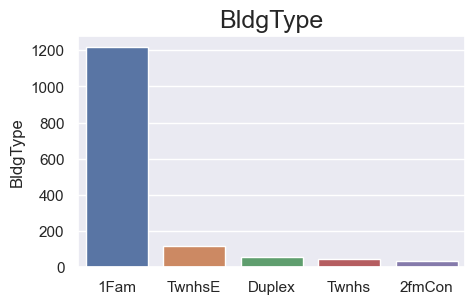

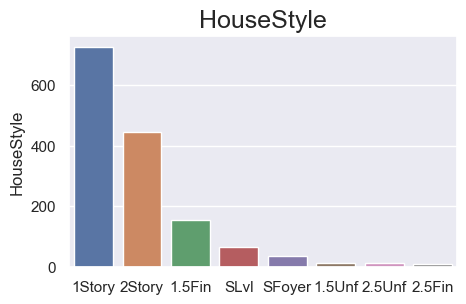

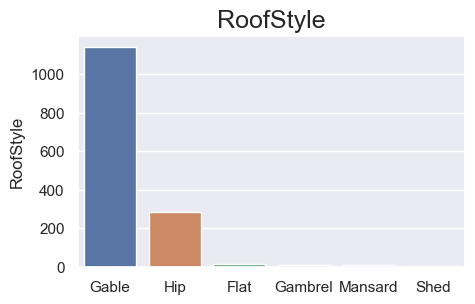

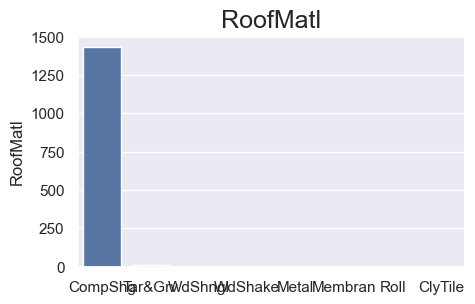

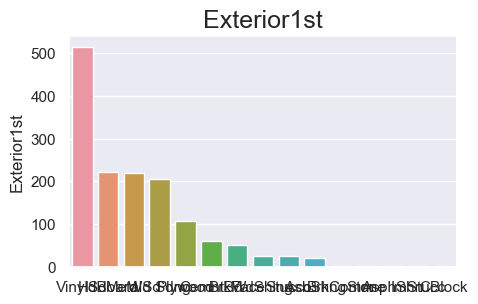

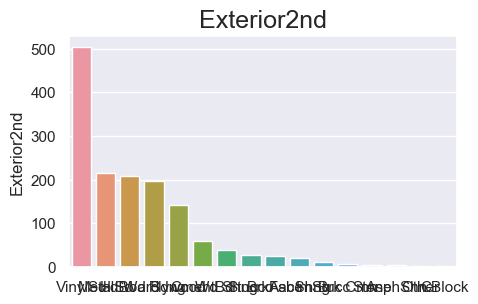

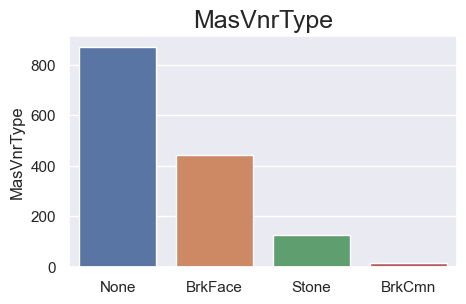

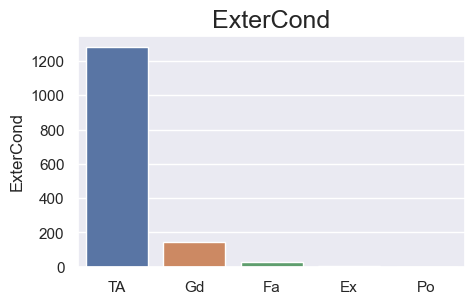

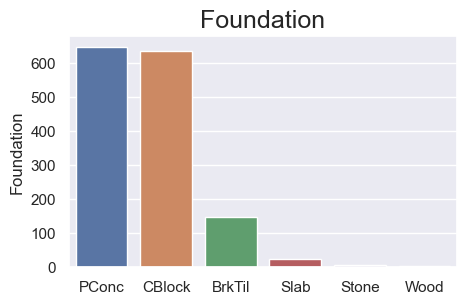

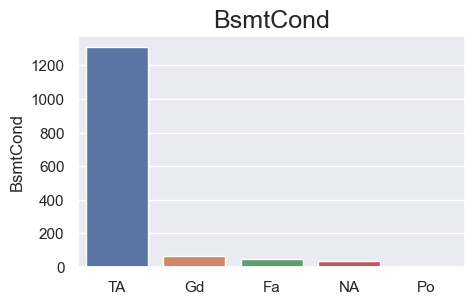

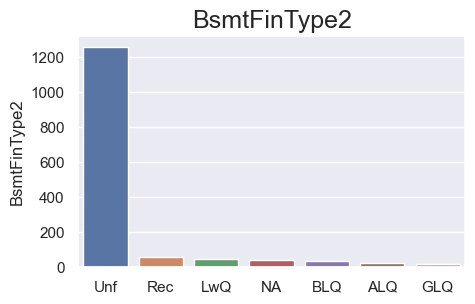

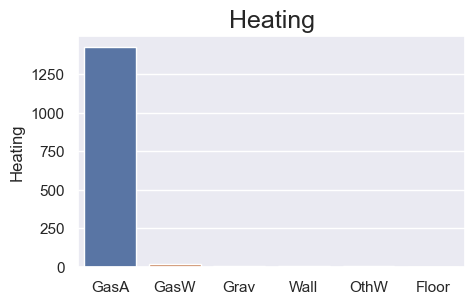

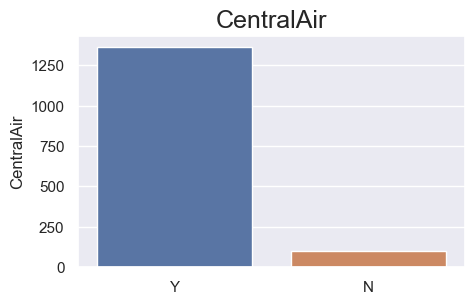

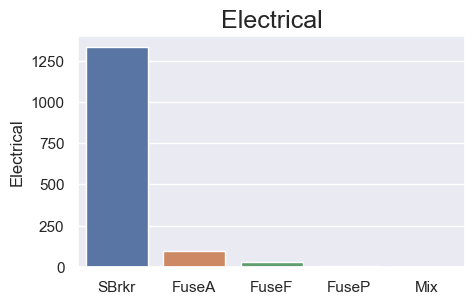

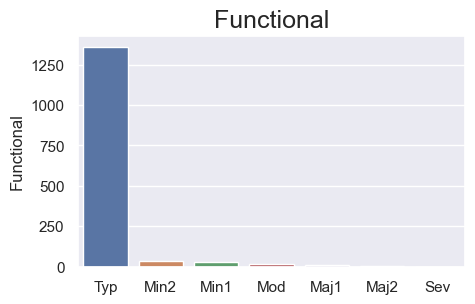

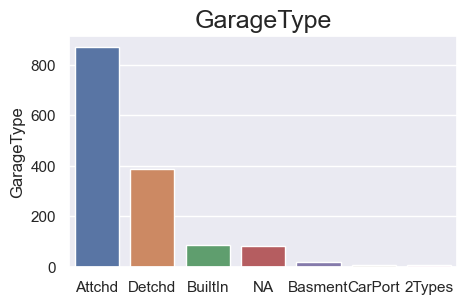

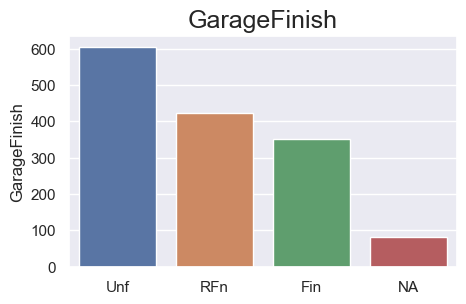

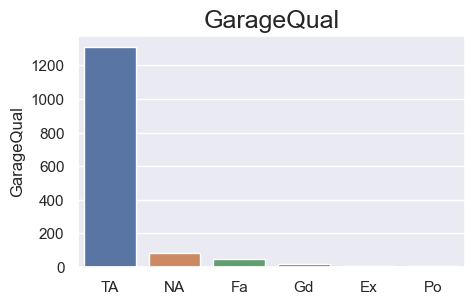

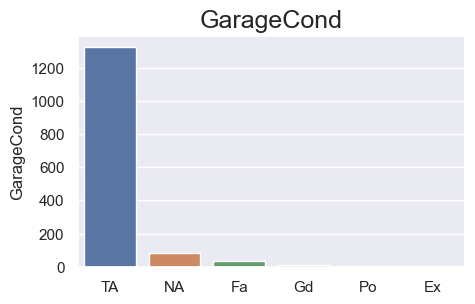

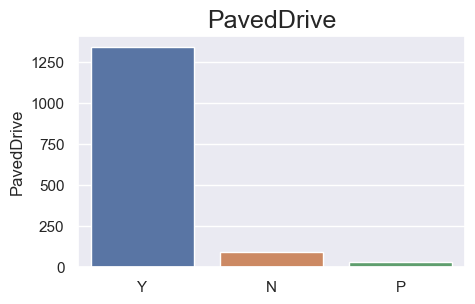

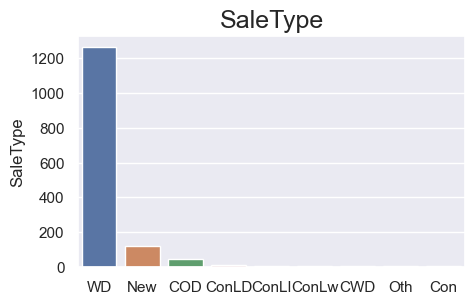

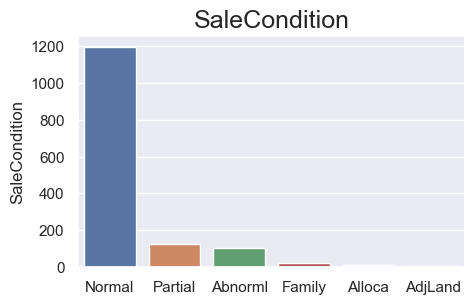

In [2699]:
## Visualizing the levels of categorical columns using bar plots
for col in df_cat.columns:
    plt.figure(figsize=(5,3))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts())
    plt.show()

In [2700]:
#check values in columns where one value seems to have a much higher count

In [2701]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [2702]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [2703]:
df['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [2704]:
df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

So, based on above analysis of Categorical columns, there are no columns that could be dropped

# Outlier Handling 

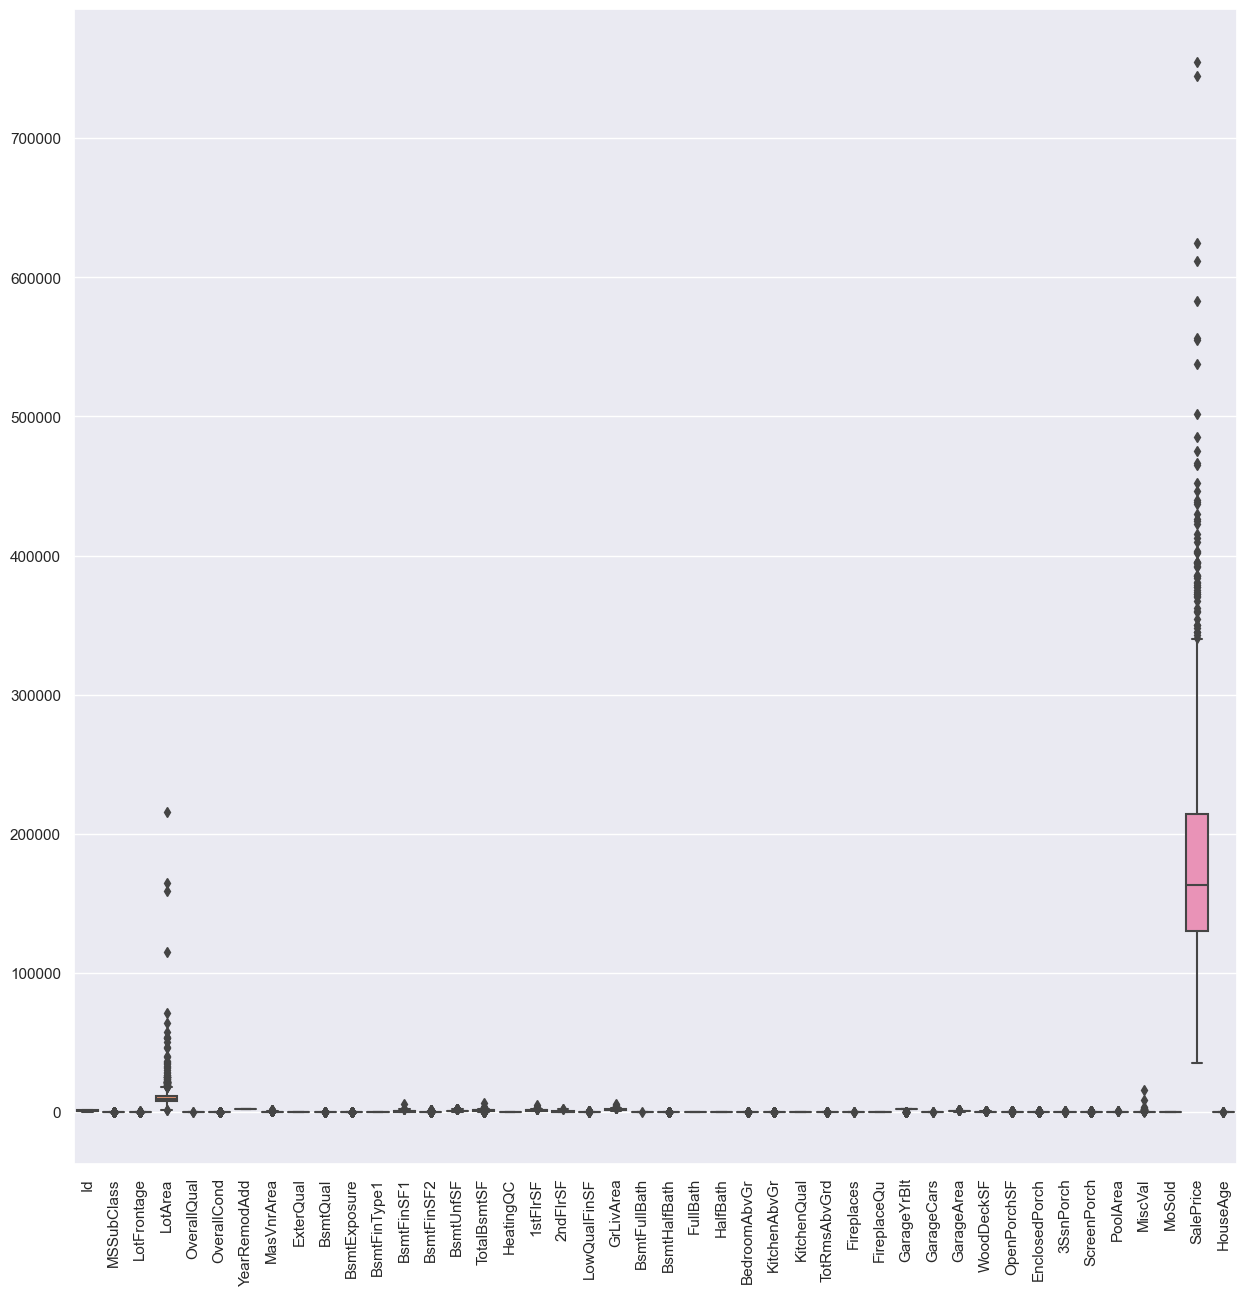

In [2705]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

Column LotArea has outliers which should be handled

In [2706]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

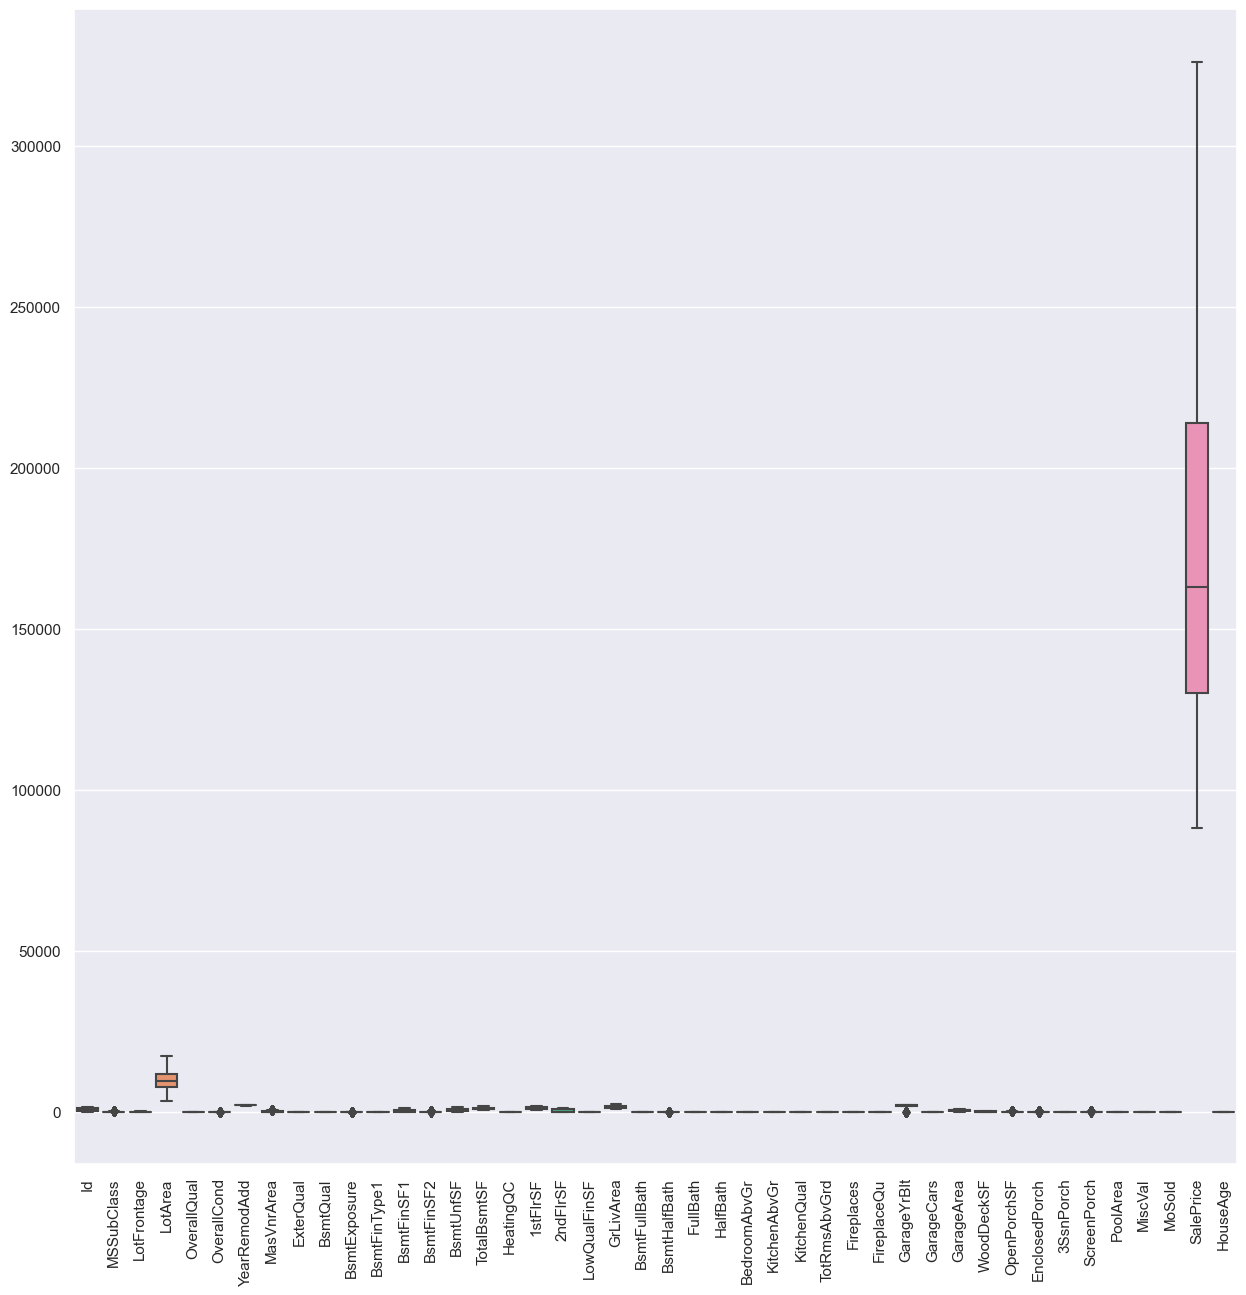

In [2707]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [2708]:
#check dataframe

df.shape

(1460, 76)

In [2709]:
# create dummy variables 

# create dummy variable for MSSubClass
MSSubClass_df = pd.get_dummies(df['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
df = pd.concat([df,MSSubClass_df],axis=1)
df.head()

#create dummy variable for MSZoning
MSZoning_df = pd.get_dummies(df['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

#concat MSZoning_df with main df df
df = pd.concat([df,MSZoning_df],axis=1)
df.head()

#create dummy variable for LotShape
LotShape_df = pd.get_dummies(df['LotShape'],drop_first=True, prefix='LotShape')

#concat LotShape_df with main df df
df = pd.concat([df,LotShape_df],axis=1)
df.head()

#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(df['LotConfig'],drop_first=True, prefix='LotConfig')

#concat LotConfig_df with main df df
df = pd.concat([df,LotConfig_df],axis=1)
df.head()

#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(df['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main df df
df = pd.concat([df,Neighborhood_df],axis=1)
df.head()

#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(df['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main df df
df = pd.concat([df,HouseStyle_df],axis=1)
df.head()
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(df['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main df df
df = pd.concat([df,RoofStyle_df],axis=1)
df.head()

#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(df['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main df df
df = pd.concat([df,Exterior1st_df],axis=1)
df.head()

#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(df['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main df df
df = pd.concat([df,Exterior2nd_df],axis=1)
df.head()

#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(df['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main df df
df = pd.concat([df,MasVnrType_df],axis=1)
df.head()

#create dummy variable for Foundation
Foundation_df = pd.get_dummies(df['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main df df
df = pd.concat([df,Foundation_df],axis=1)
df.head()
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(df['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main df df
df = pd.concat([df,GarageType_df],axis=1)
df.head()
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(df['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main df df
df = pd.concat([df,GarageFinish_df],axis=1)
df.head()




Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual ExterCond Foundation  BsmtQual BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold SaleType SaleCondition  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0          4        TA      PConc         4       TA             1             6         706          Unf           0        150          856    GasA          5          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1            4             8        Typ           0            0     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0        0       2       WD        Normal     208500         5              0              0              0              0              1              0              0              0              0   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0          3        TA     CBlock         4       TA             4             5         978          Unf           0        284         1262    GasA          5          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1            3             6        Typ           1            3     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0        0       5       WD        Normal     181500        31              0              0              0              0              0              0              0              0              0   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0          4        TA      PConc         4       TA             2             6         486          Unf           0        434          920    GasA          5          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1            4             6        Typ           1            3     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0        0       9       WD        Normal     223500         7              0              0              0              0              1              0              0              0              0   
3  

In [2710]:
#dropping original columns who's dummy variable have been created

#Drop categorical variables after ceating dummy varaibles
df=df.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])




In [2711]:
df.describe()

Id  LotFrontage        LotArea  OverallQual  OverallCond  YearRemodAdd   MasVnrArea   ExterQual     BsmtQual  BsmtExposure  BsmtFinType1   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF    HeatingQC     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd   Fireplaces  FireplaceQu  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold      SalePrice     HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.00000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  1460.000000    1460.000000    1460.000000    1460.000000    1460.000000    1460.000000    1460.000000    1460.000000    1460.000000    1460.000000    1460.000000     1460.000000     1460.000000     1460.000000     1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000        1460.000000    1460.000000    1460.000000       1460.000000           1460.000000          1460.000000   
mean    730.500000    69.863699   10516.828082     6.099315     5.575342   1984.865753   103.117123     3.39589     3.489041      1.656164      3.545890   443.639726    46.549315   567.240411  1057.429452     4.145205  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575     3.511644      6.517808     0.613014     1.825342  1868.739726     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  180921.195890    36.547945       0.047260       0.002740       0.008219       0.098630       0.204795       0.041096       0.010959       0.039726       0.013699       0.035616        0.059589        0.043151        0.006849        0.020548     0.044521     0.010959     0.788356     0.149315      0.028082      0.006849      0.633562           0.064384       0.032192       0.002740          0.720548              0.001370             0.010959   
std     421.610009    22.027677    9981.264932     1.382997     1.112799     20.645407   180.731373     0.57428     0.876478      1.039123      2.107776   456.098091   161.319273   441.866955   438.705324     0.959501   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338     0.663760      1.625393     0.644666     1.810877   453.697295     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626   79442.502883    30.250152       0.212268       0.052289       0.090317       0.298267       0.403690       0.198580       0.104145       0.195382       0.116277       0.185395        0.236805        0.203266        0.082505        0.141914     0.206319     0.104145     0.408614     0.356521      0.165264      0.082505      0.481996           0.245519       0.176570       0.052289          0.448884              0.036999             0.104145   
min       1.

In [2712]:
##Looking for columns that have very high biased data

for c in df.columns:
    if df[c].dtype == np.object :
        print(c)
        print(df[c].value_counts(normalize=True))

Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Condition1
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64
Condition2
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: Condition2, dtype: float64
BldgType
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64
RoofMatl
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.0006

In [2713]:
##Drop columns which have moe than 80% bias data
df=df.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [2714]:
df.describe()

LotFrontage        LotArea  OverallQual  OverallCond  YearRemodAdd   MasVnrArea   ExterQual     BsmtQual  BsmtExposure  BsmtFinType1   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF    HeatingQC     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd   Fireplaces  FireplaceQu  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold      SalePrice     HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
count  1460.000000    1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.00000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  1460.000000    1460.000000    1460.000000    1460.000000    1460.000000    1460.000000    1460.000000    1460.000000    1460.000000    1460.000000    1460.000000     1460.000000     1460.000000     1460.000000     1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000        1460.000000    1460.000000    1460.000000       1460.000000           1460.000000          1460.000000   
mean     69.863699   10516.828082     6.099315     5.575342   1984.865753   103.117123     3.39589     3.489041      1.656164      3.545890   443.639726    46.549315   567.240411  1057.429452     4.145205  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575     3.511644      6.517808     0.613014     1.825342  1868.739726     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  180921.195890    36.547945       0.047260       0.002740       0.008219       0.098630       0.204795       0.041096       0.010959       0.039726       0.013699       0.035616        0.059589        0.043151        0.006849        0.020548     0.044521     0.010959     0.788356     0.149315      0.028082      0.006849      0.633562           0.064384       0.032192       0.002740          0.720548              0.001370             0.010959   
std      22.027677    9981.264932     1.382997     1.112799     20.645407   180.731373     0.57428     0.876478      1.039123      2.107776   456.098091   161.319273   441.866955   438.705324     0.959501   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338     0.663760      1.625393     0.644666     1.810877   453.697295     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626   79442.502883    30.250152       0.212268       0.052289       0.090317       0.298267       0.403690       0.198580       0.104145       0.195382       0.116277       0.185395        0.236805        0.203266        0.082505        0.141914     0.206319     0.104145     0.408614     0.356521      0.165264      0.082505      0.481996           0.245519       0.176570       0.052289          0.448884              0.036999             0.104145   
min      21.000000    1300.000000     1.000000     1.00

# Bivariate Analysis

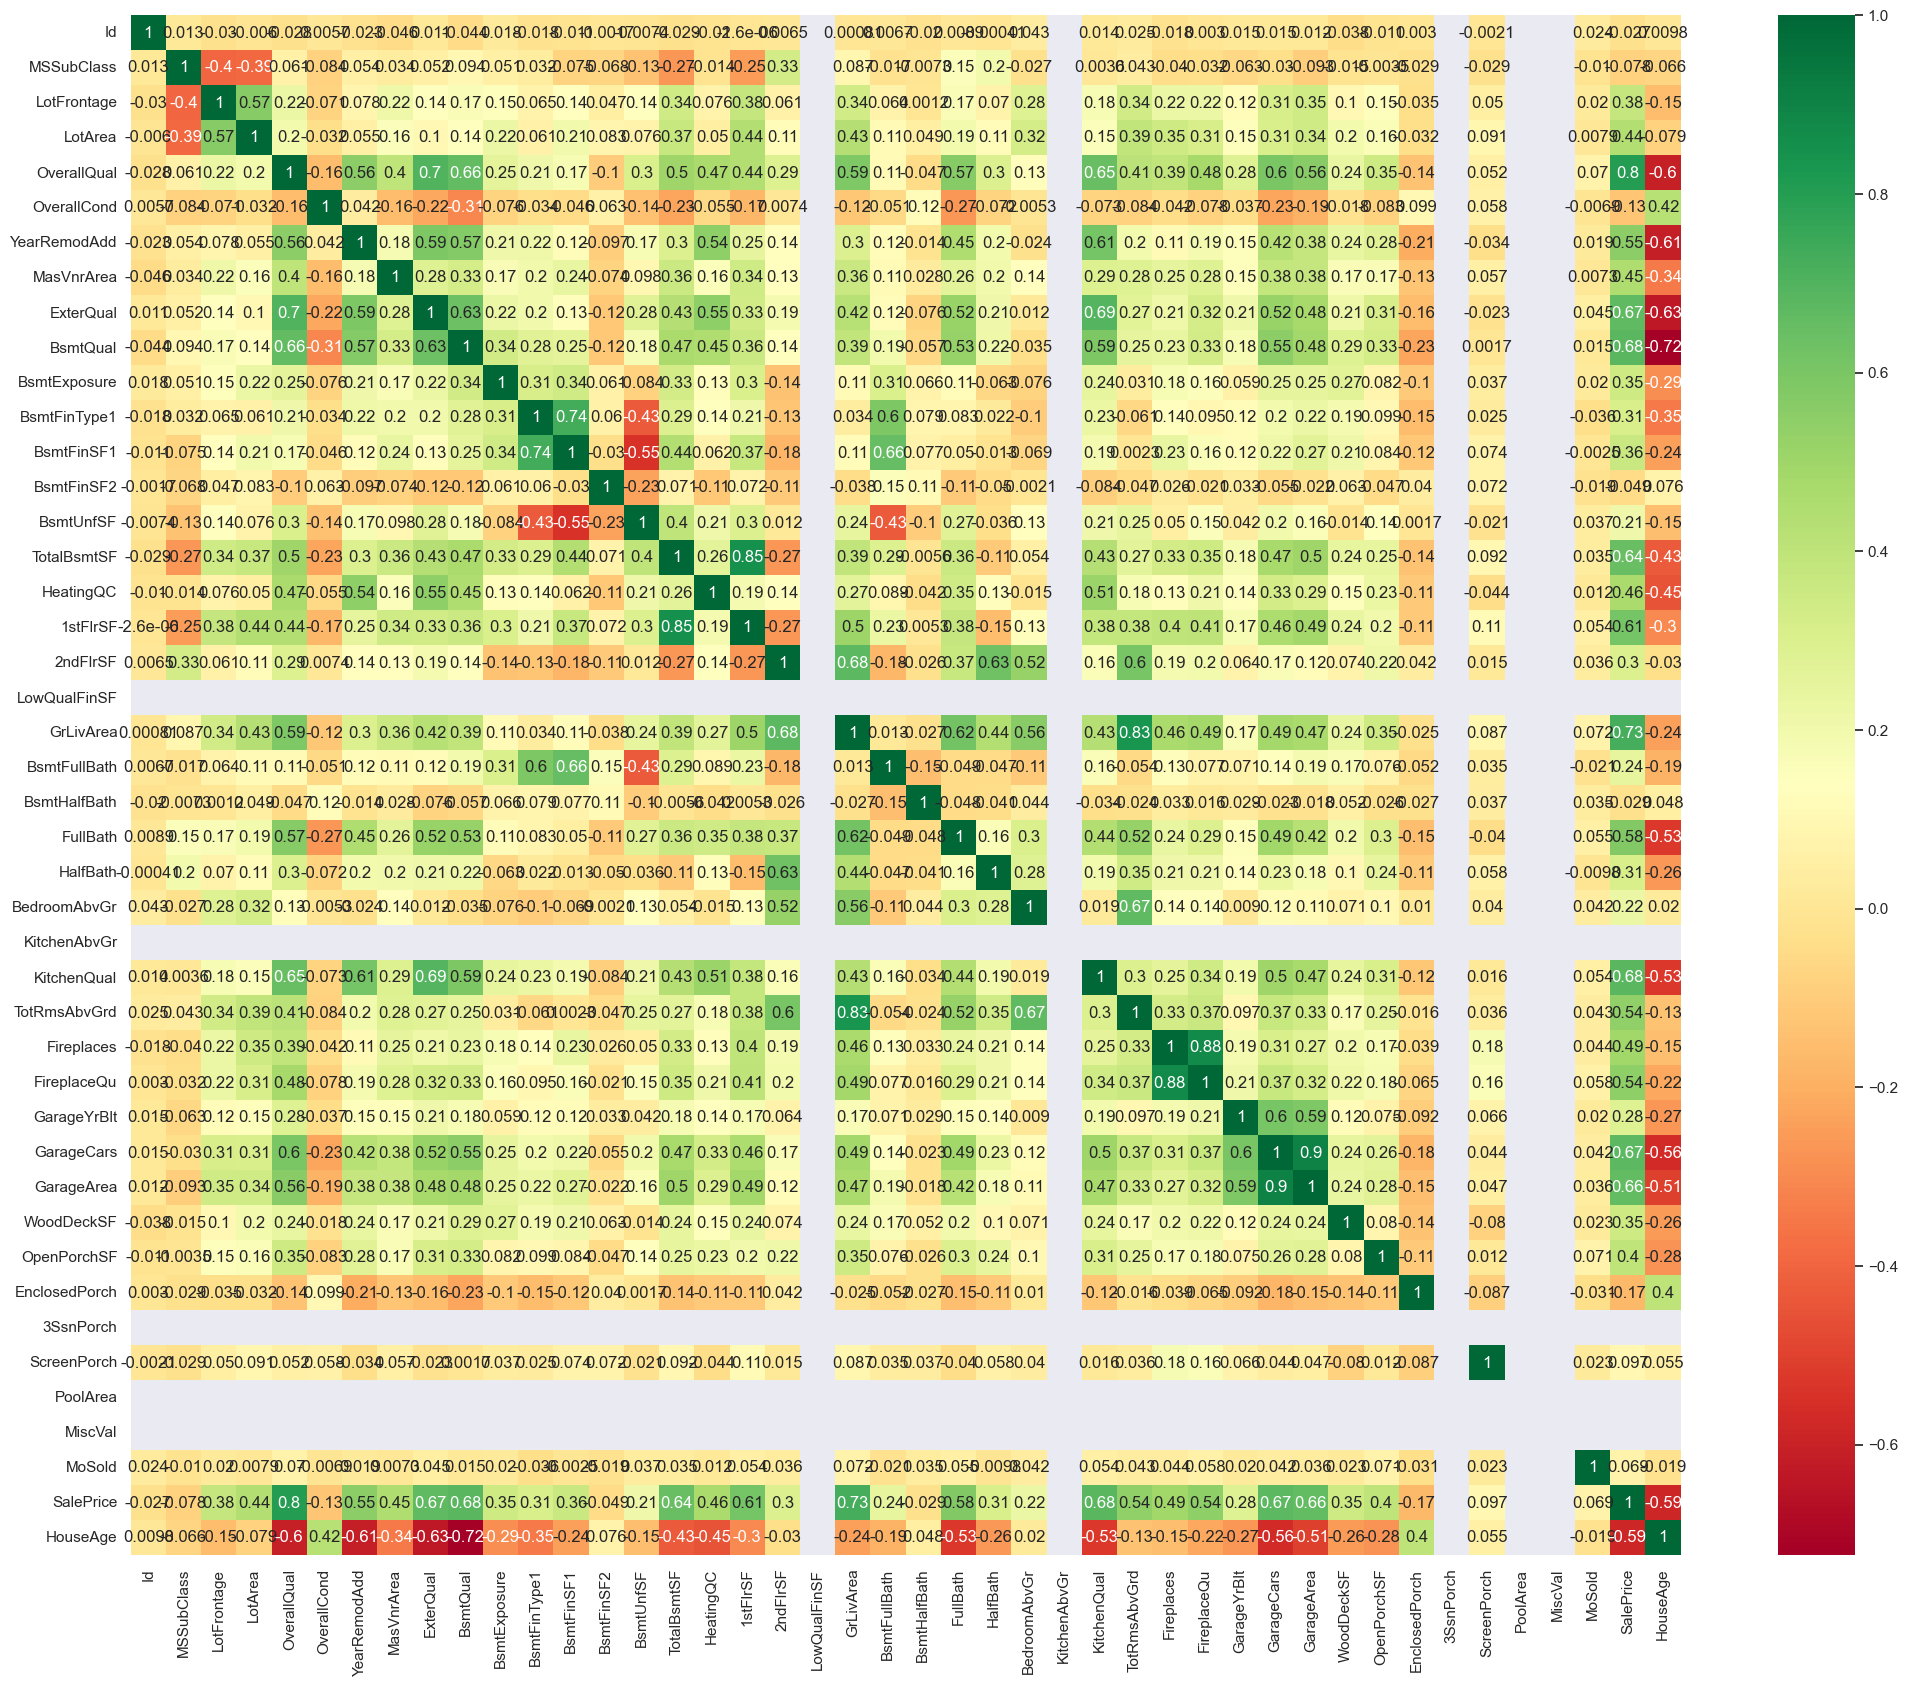

In [2715]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

Many columns are highly correlated with each other.

Target variable SalePrice is highly correlated with OverallQual, GrLivArea,KitchenQual, GarageCars and GarageArea.

As there is multicollinearity among predictors in our data, it would be good to use Ridge Regression.

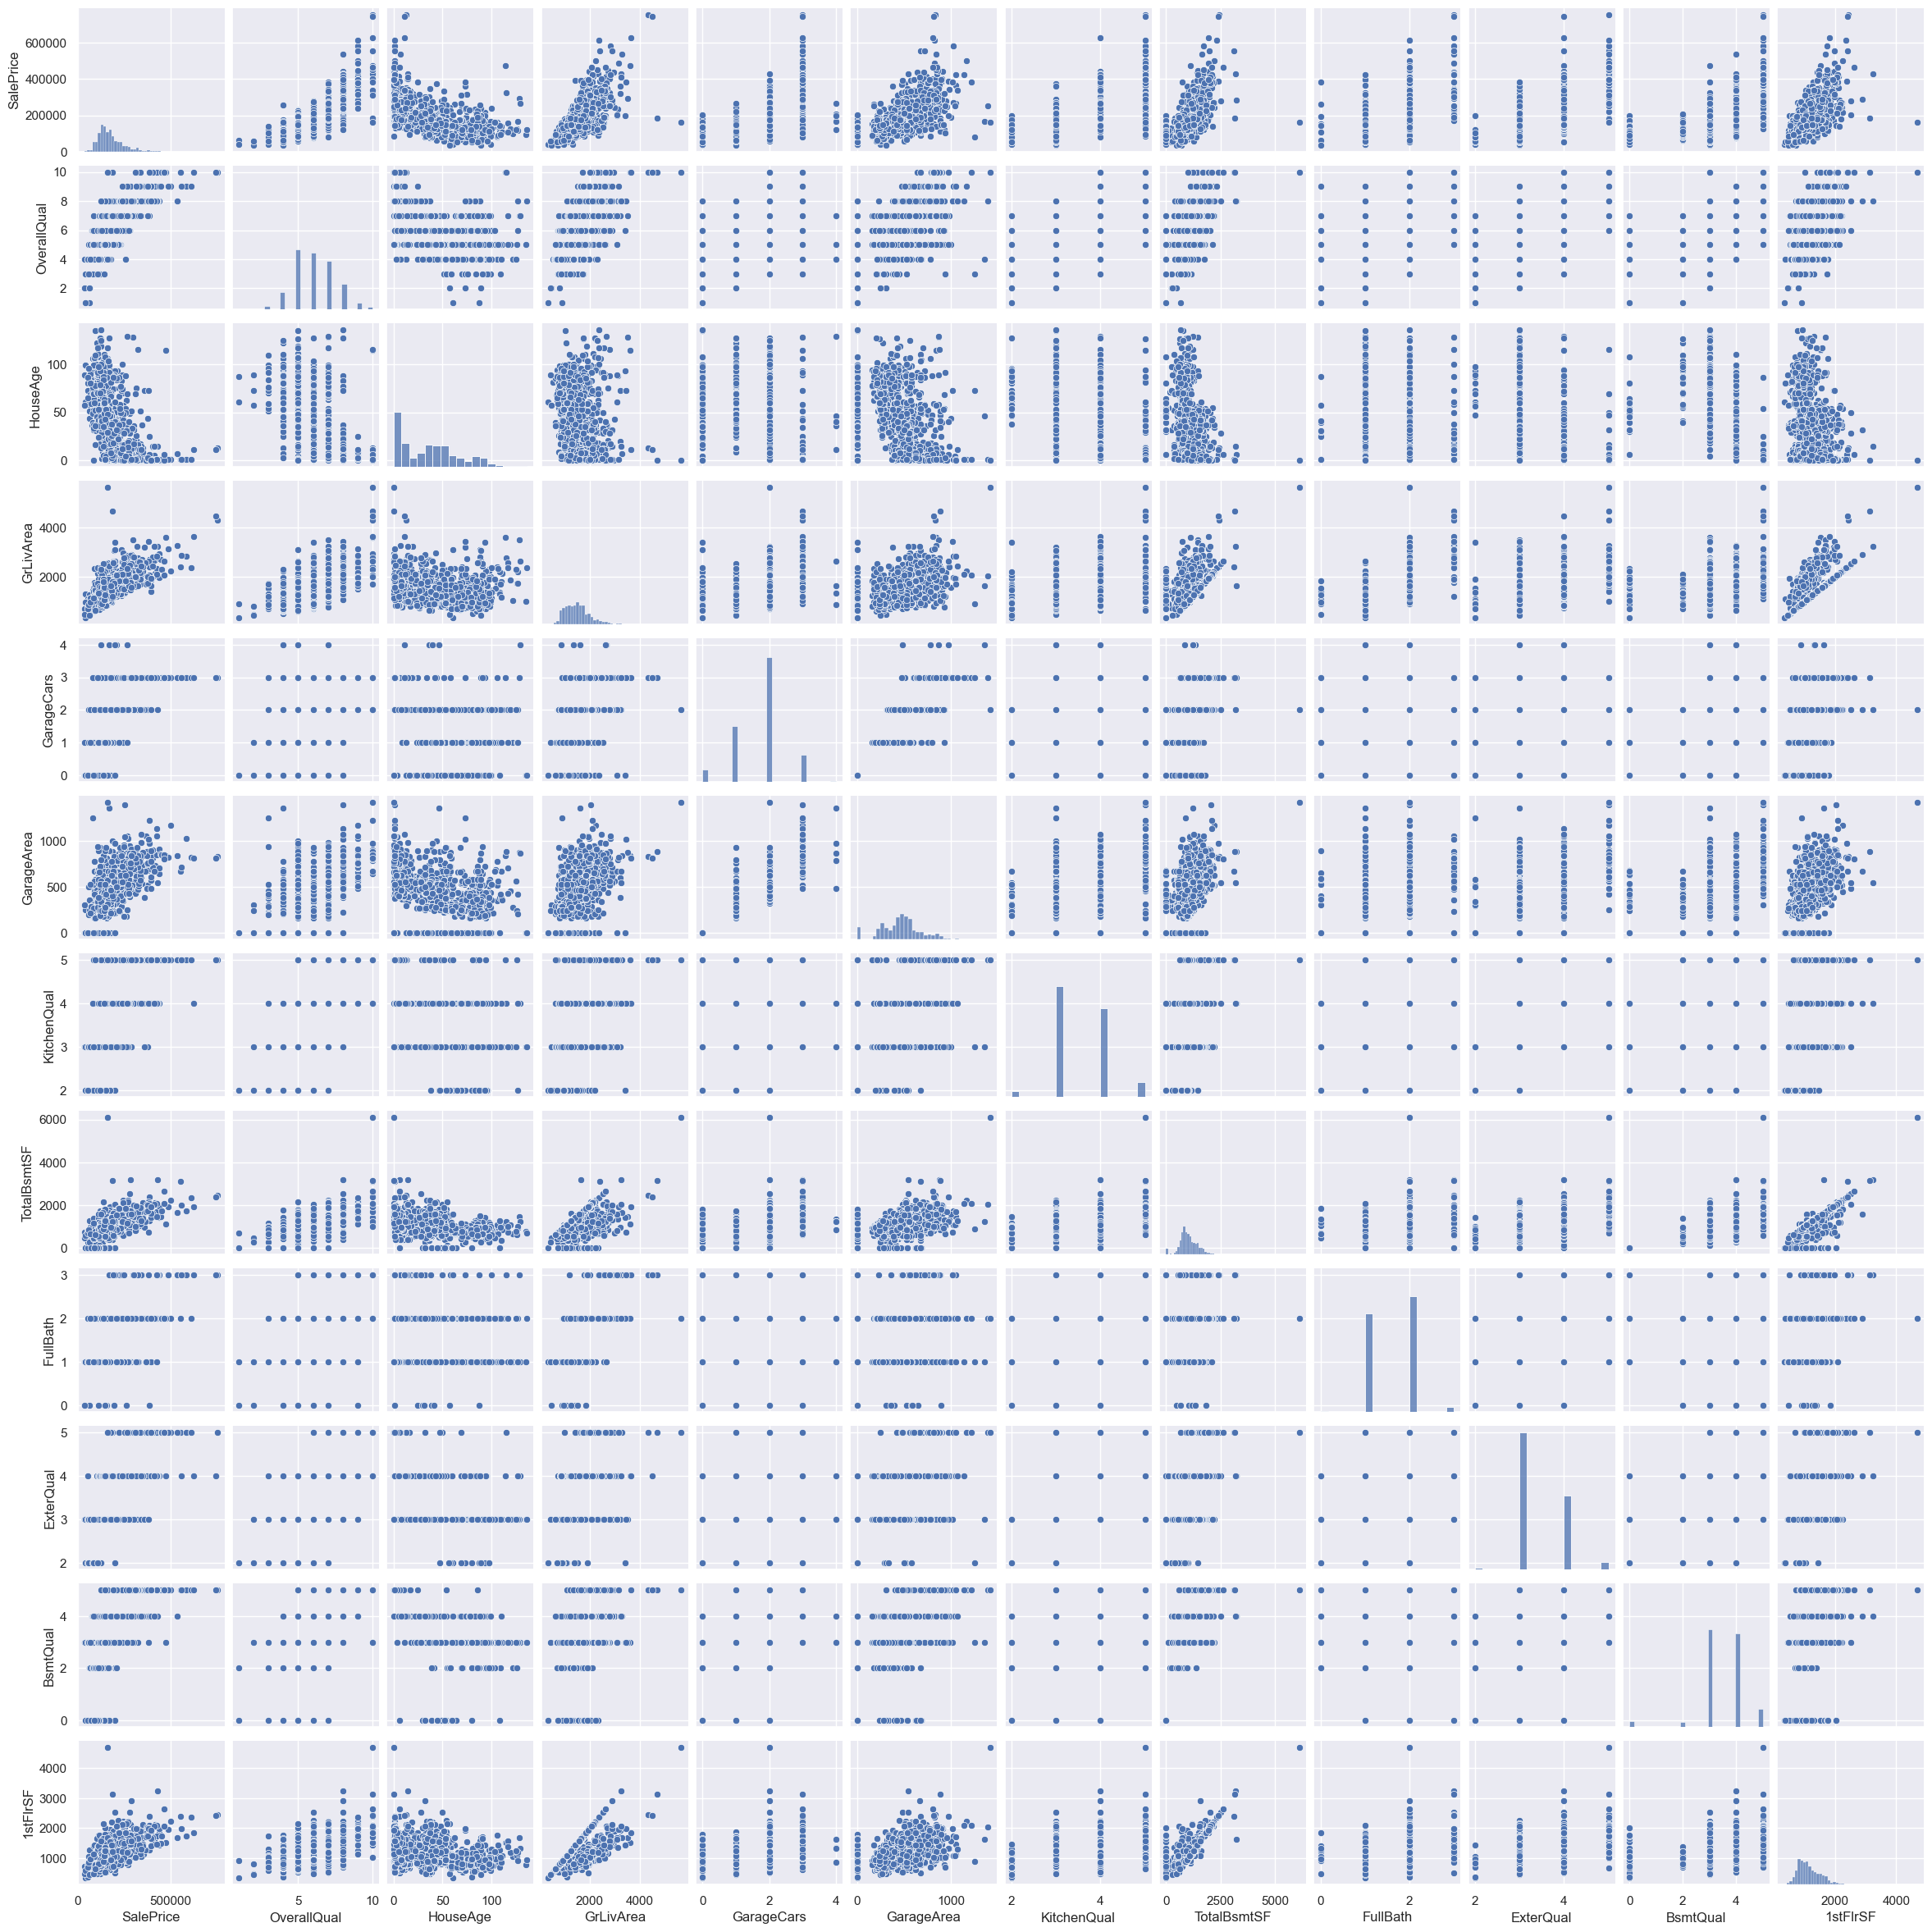

In [2716]:
#Let us plot the graphs between some of these important numerical variables and see if we see any pattern

sns.set()
cols = ['SalePrice', 'OverallQual','HouseAge','GrLivArea','GarageCars','GarageArea','KitchenQual', 'TotalBsmtSF', 'FullBath','ExterQual','BsmtQual','1stFlrSF' ]
sns.pairplot(df[cols],height = 2)
plt.show()

In [2717]:
df.shape

(1460, 149)

In [2718]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# 3. Model Building

Splitting data for training & testing

In [2719]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [2720]:
df_train.shape

(1021, 149)

In [2721]:
df_test.shape

(438, 149)

In [2722]:
#Train data prep
num_values=df_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'HouseAge'], dtype='object')

In [2723]:
##   Scaling train data
scaler = StandardScaler()
df_train[num_values] = scaler.fit_transform(df_train[num_values])
#X_test[num_values] = scaler.transform(X_test[num_values])

In [2724]:
## Test Data Prep

num_values_test=df_test.select_dtypes(include=['int64','float64']).columns
num_values

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'HouseAge'], dtype='object')

In [2725]:
##   Scaling Test data
scaler = StandardScaler()
df_test[num_values_test] = scaler.fit_transform(df_test[num_values_test])


In [2726]:
df_test['SalePrice']

1436   -0.764598
57      0.182784
780    -0.072760
382     0.394699
1170   -0.135088
726     0.500656
258     0.619079
888     1.074071
532    -0.926650
1055   -0.022898
1246    0.058129
191     0.026965
1222   -0.484123
588    -0.484123
773    -0.839392
1453   -1.213358
742    -0.035363
431    -1.270700
207    -0.509054
571    -0.770831
1263   -0.016665
1215   -0.708503
330    -0.783297
170    -0.664874
1188    0.164086
741    -0.496589
533    -1.776801
896    -0.939116
689     0.160346
1308   -0.434261
901    -0.359468
851     0.413397
1354    0.662708
976    -1.200893
1025   -0.864323
1035   -1.219591
12     -0.471658
250    -1.313083
1130   -0.583848
116    -0.533985
336     2.438127
216     0.351069
1292   -0.926650
30     -1.768075
842    -0.086472
968    -1.794253
1386    0.849691
634    -0.471658
838    -0.471658
402    -0.920418
1456    0.351069
268    -0.764598
118     1.722280
934     0.749967
751    -0.247278
1061   -1.256988
636    -1.518764
101    -0.047829
863    -0.6150

In [2727]:
#create X_train and y_train

y_train=df_train['SalePrice']
X_train=df_train.drop('SalePrice',axis=1)



In [2728]:
#create X_test and y_test

y_test=df_test['SalePrice']
X_test=df_test.drop('SalePrice',axis=1)

In [2729]:
y_train.shape

(1021,)

# 3.1  Linear Regression 

In [2730]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

X_train_lr = sm.add_constant(X_train, has_constant='add')
X_test_lr = sm.add_constant(X_test, has_constant='add')

# basic model without feature selection
lr = sm.OLS(y_train, X_train_lr).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     43.83
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          4.74e-316
Time:                        11:27:42   Log-Likelihood:                -381.57
No. Observations:                1021   AIC:                             1049.
Df Residuals:                     878   BIC:                             1754.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1595 

In [2731]:
y_pred_train_lr = lr.predict(X_train_lr)
y_pred_test_lr = lr.predict(X_test_lr)

r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
rmse_test_lr = mse_test_lr**0.5

print(f' r-squared train LR: {r2_train_lr} \n r-squared test LR: {r2_test_lr}\n root mean squared error LR: {rmse_test_lr}')

 r-squared train LR: 0.876366640298295 
 r-squared test LR: 0.849594631762211
 root mean squared error LR: 0.38782130967468637


# 3.2 Linear Reg with RFE

In [2732]:
#Importing RFE and Linear Regresssion

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2733]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [2734]:
#RFE Approach for feature selection

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=35,step=1)
rfe = rfe.fit(X_train, y_train)

In [2735]:
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'MSSubClass_75', 'MSSubClass_85', 'MSSubClass_160', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone', 'Exterior2nd_VinylSd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_Unf'], dtype='object')

In [2736]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 66),
 ('LotArea', False, 50),
 ('OverallQual', True, 1),
 ('OverallCond', False, 47),
 ('YearRemodAdd', False, 102),
 ('MasVnrArea', False, 65),
 ('ExterQual', False, 64),
 ('BsmtQual', False, 40),
 ('BsmtExposure', False, 27),
 ('BsmtFinType1', False, 55),
 ('BsmtFinSF1', False, 8),
 ('BsmtFinSF2', False, 9),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 109),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 2),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 63),
 ('BsmtHalfBath', False, 85),
 ('FullBath', False, 77),
 ('HalfBath', False, 80),
 ('BedroomAbvGr', False, 71),
 ('KitchenAbvGr', False, 62),
 ('KitchenQual', False, 32),
 ('TotRmsAbvGrd', False, 70),
 ('Fireplaces', False, 75),
 ('FireplaceQu', False, 106),
 ('GarageYrBlt', False, 111),
 ('GarageCars', False, 36),
 ('GarageArea', False, 88),
 ('WoodDeckSF', False, 89),
 ('OpenPorchSF', False, 108),
 ('EnclosedPorch', False, 93),
 ('3SsnPorch', Fa

In [2737]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn'], dtype='object', length=113)

# Building Model with RFE

In [2738]:
#ceating X_train with RFE selected columns
X_train_rfe = X_train[col]

In [2739]:
X_train_rfe

OverallQual  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  MSSubClass_75  MSSubClass_85  MSSubClass_160  LotShape_IR3  LotConfig_CulDSac  LotConfig_FR3  Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_Somerst  Neighborhood_Veenker  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  Exterior1st_AsphShn  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_ImStucc  Exterior1st_Stone  Exterior1st_Stucco  Exterior2nd_AsphShn  Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_ImStucc  Exterior2nd_Stone  Exterior2nd_VinylSd  GarageType_NA  GarageFinish_NA  GarageFinish_Unf
210     -0.779861    -0.430911 -0.765065 -0.787597  -1.228053              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  1                  0                  0                    0                   0                    0                    0                  0                   1                    0                   0                    0                    0                  0                    0              1                1                 0
318      0.649651     0.621579  0.511914  2.140556   2.123103              0              0               0             0                  0              0                     0                     0                     1                     0                     0                     0                  0                  0                  0                    0                   0                    0                    0                  0                   0                    0                   0                    0                    0                  0                    0              0                0                 0
239     -0.065105    -0.712011 -0.930972  0.795996  -0.056465              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                  0                    0                   0                    0                    0                  0                   0                    0                   0                    0                    0                  0                    1              0                0                 1
986     -0.065105    -1.256778 -0.420683  0.669584   0.221858              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                  0                    0                   0                    0                    0                  0                   0                    0                   0                    0                    0                  0                    1              0                0                 1
1416    -1.494617    -0.620490  0.195183  1.611926   1.453624              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                  0                    0                   0                    0                    0                  0                   0                    0                   0                    0                    0                  0                    0              0                0                 1
...           ...          ...       ...       ...        ...            ...            ...             ...           ...                ...            ...           

In [2740]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [2741]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [2742]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:43   Log-Likelihood:                -610.54
No. Observations:                1021   AIC:                             1287.
Df Residuals:                     988   BIC:                             1450.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1816      0.039     -4.654      0.000      -0.258      -0.105
OverallQual              0.3506      0.023     15.051      0.000       0.305       0.396
TotalBsmtSF              0.0836      0.027      3.058      0.002       0.030       0.137
1stFlrSF                 0.3255      0.137      2.376      0.018       0.057       0.594
2ndFlrSF                 0.3718      0.146      2.546      0.011       0.085       0.658
GrLivArea               -0.0724      0.180     -0.403      0.687      -0.425       0.280
MSSubClass_75            0.2797      0.269      1.039      0.299      -0.249       0.808
MSSubClass_85            0.2797      0.123      2.271      0.023       0.038       0.521
MSSubClass_160          -0.3212      0.077     -4.189      0.000      -0.472      -0.171
LotShape_IR3            -0.2647      0.154     -1.722      0.085      -0.566       0.037
LotConfig_CulDSac        0.2280      0.059      3.849      0.000       0.112       0.344
LotConfig_FR3           -0.2393      0.261     -0.919      0.359      -0.751       0.272
Neighborhood_ClearCr     0.4053      0.104      3.904      0.000       0.202       0.609
Neighborhood_Crawfor     0.4025      0.084      4.791      0.000       0.238       0.567
Neighborhood_NoRidge     0.7841      0.089      8.819      0.000       0.610       0.959
Neighborhood_NridgHt     0.6746      0.069      9.785      0.000       0.539       0.810
Neighborhood_Somerst     0.3348      0.067      5.009      0.000       0.204       0.466
Neighborhood_Veenker     0.5225      0.138      3.778      0.000       0.251       0.794
HouseStyle_1Story        0.1928      0.052      3.730      0.000       0.091       0.294
HouseStyle_2.5Fin       -0.3921      0.286     -1.371      0.171      -0.953       0.169
HouseStyle_2.5Unf       -0.6175      0.285     -2.168      0.030      -1.176      -0.059
Exterior1st_AsphShn     -0.2293      0.230     -0.995      0.320      -0.681       0.223
Exterior1st_CBlock      -0.0613      0.225     -0.272      0.785      -0.503       0.380
Exterior1st_CemntBd     -0.5516      0.324     -1.704      0.089      -1.187       0.084
Exterior1st_ImStucc     -0.8503      0.485     -1.753      0.080      -1.802       0.102
Exterior1st_Stone       -0.2226      0.355     -0.627      0.531      -0.919       0.474
Exterior1st_Stucco      -0.3360      0.104     -3.216      0.001      -0.541      -0.131
Exterior2nd_AsphShn     -0.2293      0.230     -0.995      0.320      -0.681       0.223
Exterior2nd_CBlock      -0.0613      0.225     -0.272      0.785      -0.503       0.380
Exterior2nd_CmentBd      0.7648      0.325      2.357      0.019       0.128       1.402
Exterior2nd_ImStucc      0.4405      0.171      2.570      0.010       0.104       0.777
Exterior2nd_Stone        0.3184      0.290      1.098    

In [2743]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
21   Exterior1st_AsphShn     inf
34       GarageFinish_NA     inf
33         GarageType_NA     inf
28    Exterior2nd_CBlock     inf
27   Exterior2nd_AsphShn     inf
22    Exterior1st_CBlock     inf
5              GrLivArea  164.89
4               2ndFlrSF  108.78
3               1stFlrSF   95.75
29   Exterior2nd_CmentBd   18.77
23   Exterior1st_CemntBd   18.69
0                  const    7.77
2            TotalBsmtSF    3.81
6          MSSubClass_75    3.59
18     HouseStyle_1Story    3.41
20     HouseStyle_2.5Unf    3.22
1            OverallQual    2.77
35      GarageFinish_Unf    1.67
19     HouseStyle_2.5Fin    1.63
32   Exterior2nd_VinylSd    1.44
15  Neighborhood_NridgHt    1.32
14  Neighborhood_NoRidge    1.30
8         MSSubClass_160    1.29
16  Neighborhood_Somerst    1.26
31     Exterior2nd_Stone    1.26
25     Exterior1st_Stone    1.26
24   Exterior1st_ImStucc    1.17
30   Exterior2nd_ImStucc    1.17
26    Exterior1st_Stucco    1.12
7          MSSubClass_85    1.12
13  Neighborhood_Crawfor    1.09
10     LotConfig_CulDSac    1.07
12  Neighborhood_ClearCr    1.06
9           LotShape_IR3    1.05
17  Neighborhood_Veenker    1.04
11         LotConfig_FR3    1.01

#Exterior1st_AsphShn has very high VIF and also high P value, lets drop it

In [2744]:
X_train_rfe = X_train_rfe.drop(['Exterior1st_AsphShn'],axis=1)

In [2745]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [2746]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [2747]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:43   Log-Likelihood:                -610.54
No. Observations:                1021   AIC:                             1287.
Df Residuals:                     988   BIC:                             1450.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1816 

In [2748]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
33       GarageFinish_NA     inf
32         GarageType_NA     inf
27    Exterior2nd_CBlock     inf
21    Exterior1st_CBlock     inf
5              GrLivArea  164.89
4               2ndFlrSF  108.78
3               1stFlrSF   95.75
28   Exterior2nd_CmentBd   18.77
22   Exterior1st_CemntBd   18.69
0                  const    7.77
2            TotalBsmtSF    3.81
6          MSSubClass_75    3.59
18     HouseStyle_1Story    3.41
20     HouseStyle_2.5Unf    3.22
1            OverallQual    2.77
34      GarageFinish_Unf    1.67
19     HouseStyle_2.5Fin    1.63
31   Exterior2nd_VinylSd    1.44
15  Neighborhood_NridgHt    1.32
14  Neighborhood_NoRidge    1.30
8         MSSubClass_160    1.29
16  Neighborhood_Somerst    1.26
24     Exterior1st_Stone    1.26
30     Exterior2nd_Stone    1.26
29   Exterior2nd_ImStucc    1.17
23   Exterior1st_ImStucc    1.17
7          MSSubClass_85    1.12
25    Exterior1st_Stucco    1.12
13  Neighborhood_Crawfor    1.09
10     LotConfig_CulDSac    1.07
26   Exterior2nd_AsphShn    1.06
12  Neighborhood_ClearCr    1.06
9           LotShape_IR3    1.05
17  Neighborhood_Veenker    1.04
11         LotConfig_FR3    1.01

In [2749]:
X_train_rfe

const  OverallQual  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  MSSubClass_75  MSSubClass_85  MSSubClass_160  LotShape_IR3  LotConfig_CulDSac  LotConfig_FR3  Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_Somerst  Neighborhood_Veenker  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_ImStucc  Exterior1st_Stone  Exterior1st_Stucco  Exterior2nd_AsphShn  Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_ImStucc  Exterior2nd_Stone  Exterior2nd_VinylSd  GarageType_NA  GarageFinish_NA  GarageFinish_Unf
210     1.0    -0.779861    -0.430911 -0.765065 -0.787597  -1.228053              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  1                  0                  0                   0                    0                    0                  0                   1                    0                   0                    0                    0                  0                    0              1                1                 0
318     1.0     0.649651     0.621579  0.511914  2.140556   2.123103              0              0               0             0                  0              0                     0                     0                     1                     0                     0                     0                  0                  0                  0                   0                    0                    0                  0                   0                    0                   0                    0                    0                  0                    0              0                0                 0
239     1.0    -0.065105    -0.712011 -0.930972  0.795996  -0.056465              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                  0                   0                    0                    0                  0                   0                    0                   0                    0                    0                  0                    1              0                0                 1
986     1.0    -0.065105    -1.256778 -0.420683  0.669584   0.221858              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                  0                   0                    0                    0                  0                   0                    0                   0                    0                    0                  0                    1              0                0                 1
1416    1.0    -1.494617    -0.620490  0.195183  1.611926   1.453624              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                  0                   0                    0                    0                  0                   0                    0                   0                    0                    0                  0                    0              0                0                 1
...     ...          ...          ...       ...       ...        ...            ...            ...             ...           ...                ...            ...                   ...                   ...                   ...                   ...

In [2750]:
#GarageFinish_NA has very high VIF , lets drop it

In [2751]:
X_train_rfe = X_train_rfe.drop(['GarageFinish_NA'],axis=1)

X_train_rfe2 = sm.add_constant(X_train_rfe)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:44   Log-Likelihood:                -610.54
No. Observations:                1021   AIC:                             1287.
Df Residuals:                     988   BIC:                             1450.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1816 

In [2752]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
27    Exterior2nd_CBlock     inf
21    Exterior1st_CBlock     inf
5              GrLivArea  164.89
4               2ndFlrSF  108.78
3               1stFlrSF   95.75
28   Exterior2nd_CmentBd   18.77
22   Exterior1st_CemntBd   18.69
0                  const    7.77
2            TotalBsmtSF    3.81
6          MSSubClass_75    3.59
18     HouseStyle_1Story    3.41
20     HouseStyle_2.5Unf    3.22
1            OverallQual    2.77
33      GarageFinish_Unf    1.67
19     HouseStyle_2.5Fin    1.63
31   Exterior2nd_VinylSd    1.44
32         GarageType_NA    1.35
15  Neighborhood_NridgHt    1.32
14  Neighborhood_NoRidge    1.30
8         MSSubClass_160    1.29
30     Exterior2nd_Stone    1.26
24     Exterior1st_Stone    1.26
16  Neighborhood_Somerst    1.26
23   Exterior1st_ImStucc    1.17
29   Exterior2nd_ImStucc    1.17
25    Exterior1st_Stucco    1.12
7          MSSubClass_85    1.12
13  Neighborhood_Crawfor    1.09
10     LotConfig_CulDSac    1.07
26   Exterior2nd_AsphShn    1.06
12  Neighborhood_ClearCr    1.06
9           LotShape_IR3    1.05
17  Neighborhood_Veenker    1.04
11         LotConfig_FR3    1.01

In [2753]:
X_train_rfe

const  OverallQual  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  MSSubClass_75  MSSubClass_85  MSSubClass_160  LotShape_IR3  LotConfig_CulDSac  LotConfig_FR3  Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_Somerst  Neighborhood_Veenker  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_ImStucc  Exterior1st_Stone  Exterior1st_Stucco  Exterior2nd_AsphShn  Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_ImStucc  Exterior2nd_Stone  Exterior2nd_VinylSd  GarageType_NA  GarageFinish_Unf
210     1.0    -0.779861    -0.430911 -0.765065 -0.787597  -1.228053              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  1                  0                  0                   0                    0                    0                  0                   1                    0                   0                    0                    0                  0                    0              1                 0
318     1.0     0.649651     0.621579  0.511914  2.140556   2.123103              0              0               0             0                  0              0                     0                     0                     1                     0                     0                     0                  0                  0                  0                   0                    0                    0                  0                   0                    0                   0                    0                    0                  0                    0              0                 0
239     1.0    -0.065105    -0.712011 -0.930972  0.795996  -0.056465              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                  0                   0                    0                    0                  0                   0                    0                   0                    0                    0                  0                    1              0                 1
986     1.0    -0.065105    -1.256778 -0.420683  0.669584   0.221858              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                  0                   0                    0                    0                  0                   0                    0                   0                    0                    0                  0                    1              0                 1
1416    1.0    -1.494617    -0.620490  0.195183  1.611926   1.453624              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                  0                   0                    0                    0                  0                   0                    0                   0                    0                    0                  0                    0              0                 1
...     ...          ...          ...       ...       ...        ...            ...            ...             ...           ...                ...            ...                   ...                   ...                   ...                   ...                   ...                   ...                ...                ...                ... 

In [2754]:
#Exterior2nd_CBlock has very high VIF, lets drop it

X_train_rfe = X_train_rfe.drop(['Exterior2nd_CBlock'],axis=1)

X_train_rfe3 = sm.add_constant(X_train_rfe)





In [2755]:
X_train_rfe3

const  OverallQual  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  MSSubClass_75  MSSubClass_85  MSSubClass_160  LotShape_IR3  LotConfig_CulDSac  LotConfig_FR3  Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_Somerst  Neighborhood_Veenker  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_ImStucc  Exterior1st_Stone  Exterior1st_Stucco  Exterior2nd_AsphShn  Exterior2nd_CmentBd  Exterior2nd_ImStucc  Exterior2nd_Stone  Exterior2nd_VinylSd  GarageType_NA  GarageFinish_Unf
210     1.0    -0.779861    -0.430911 -0.765065 -0.787597  -1.228053              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  1                  0                  0                   0                    0                    0                  0                   1                    0                    0                    0                  0                    0              1                 0
318     1.0     0.649651     0.621579  0.511914  2.140556   2.123103              0              0               0             0                  0              0                     0                     0                     1                     0                     0                     0                  0                  0                  0                   0                    0                    0                  0                   0                    0                    0                    0                  0                    0              0                 0
239     1.0    -0.065105    -0.712011 -0.930972  0.795996  -0.056465              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                  0                   0                    0                    0                  0                   0                    0                    0                    0                  0                    1              0                 1
986     1.0    -0.065105    -1.256778 -0.420683  0.669584   0.221858              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                  0                   0                    0                    0                  0                   0                    0                    0                    0                  0                    1              0                 1
1416    1.0    -1.494617    -0.620490  0.195183  1.611926   1.453624              0              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                  0                   0                    0                    0                  0                   0                    0                    0                    0                  0                    0              0                 1
...     ...          ...          ...       ...       ...        ...            ...            ...             ...           ...                ...            ...                   ...                   ...                   ...                   ...                   ...                   ...                ...                ...                ...                 ...                  ...                  ...                ...                 ...                  ..

In [2756]:
lm3 = sm.OLS(y_train,X_train_rfe3).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:44   Log-Likelihood:                -610.54
No. Observations:                1021   AIC:                             1287.
Df Residuals:                     988   BIC:                             1450.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1816 

In [2757]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
5              GrLivArea  164.89
4               2ndFlrSF  108.78
3               1stFlrSF   95.75
27   Exterior2nd_CmentBd   18.77
22   Exterior1st_CemntBd   18.69
0                  const    7.77
2            TotalBsmtSF    3.81
6          MSSubClass_75    3.59
18     HouseStyle_1Story    3.41
20     HouseStyle_2.5Unf    3.22
1            OverallQual    2.77
32      GarageFinish_Unf    1.67
19     HouseStyle_2.5Fin    1.63
30   Exterior2nd_VinylSd    1.44
31         GarageType_NA    1.35
15  Neighborhood_NridgHt    1.32
14  Neighborhood_NoRidge    1.30
8         MSSubClass_160    1.29
24     Exterior1st_Stone    1.26
29     Exterior2nd_Stone    1.26
16  Neighborhood_Somerst    1.26
23   Exterior1st_ImStucc    1.17
28   Exterior2nd_ImStucc    1.17
25    Exterior1st_Stucco    1.12
7          MSSubClass_85    1.12
13  Neighborhood_Crawfor    1.09
10     LotConfig_CulDSac    1.07
26   Exterior2nd_AsphShn    1.06
12  Neighborhood_ClearCr    1.06
9           LotShape_IR3    1.05
17  Neighborhood_Veenker    1.04
21    Exterior1st_CBlock    1.01
11         LotConfig_FR3    1.01

In [2758]:
#GrLivArea has a very high VIF and P value, lets drop it

In [2759]:


X_train_rfe = X_train_rfe.drop(['GrLivArea'],axis=1)

X_train_rfe4 = sm.add_constant(X_train_rfe)

lm4 = sm.OLS(y_train,X_train_rfe4).fit()

print(lm4.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     132.9
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:44   Log-Likelihood:                -610.62
No. Observations:                1021   AIC:                             1285.
Df Residuals:                     989   BIC:                             1443.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1829 

In [2760]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features    VIF
26   Exterior2nd_CmentBd  18.77
21   Exterior1st_CemntBd  18.69
0                  const   7.72
2            TotalBsmtSF   3.80
3               1stFlrSF   3.74
5          MSSubClass_75   3.56
4               2ndFlrSF   3.43
17     HouseStyle_1Story   3.31
19     HouseStyle_2.5Unf   3.20
1            OverallQual   2.77
31      GarageFinish_Unf   1.67
29   Exterior2nd_VinylSd   1.44
18     HouseStyle_2.5Fin   1.41
14  Neighborhood_NridgHt   1.32
30         GarageType_NA   1.31
13  Neighborhood_NoRidge   1.30
7         MSSubClass_160   1.29
15  Neighborhood_Somerst   1.26
28     Exterior2nd_Stone   1.26
23     Exterior1st_Stone   1.26
27   Exterior2nd_ImStucc   1.17
22   Exterior1st_ImStucc   1.17
24    Exterior1st_Stucco   1.12
6          MSSubClass_85   1.12
12  Neighborhood_Crawfor   1.09
9      LotConfig_CulDSac   1.07
25   Exterior2nd_AsphShn   1.06
11  Neighborhood_ClearCr   1.05
8           LotShape_IR3   1.05
16  Neighborhood_Veenker   1.04
20    Exterior1st_CBlock   1.01
10         LotConfig_FR3   1.01

In [2761]:
#Exterior2nd_CmentBd

#Exterior2nd_CmentBd has very high VIF and also high P value, lets drop it

X_train_rfe = X_train_rfe.drop(['Exterior2nd_CmentBd'],axis=1)

X_train_rfe5 = sm.add_constant(X_train_rfe)

lm5 = sm.OLS(y_train,X_train_rfe5).fit()

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     136.5
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:45   Log-Likelihood:                -613.50
No. Observations:                1021   AIC:                             1289.
Df Residuals:                     990   BIC:                             1442.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1785 

In [2762]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const  7.70
2            TotalBsmtSF  3.80
3               1stFlrSF  3.74
5          MSSubClass_75  3.56
4               2ndFlrSF  3.43
17     HouseStyle_1Story  3.31
19     HouseStyle_2.5Unf  3.20
1            OverallQual  2.76
30      GarageFinish_Unf  1.67
28   Exterior2nd_VinylSd  1.43
18     HouseStyle_2.5Fin  1.41
14  Neighborhood_NridgHt  1.32
29         GarageType_NA  1.31
13  Neighborhood_NoRidge  1.30
7         MSSubClass_160  1.29
15  Neighborhood_Somerst  1.26
27     Exterior2nd_Stone  1.26
23     Exterior1st_Stone  1.26
26   Exterior2nd_ImStucc  1.17
22   Exterior1st_ImStucc  1.17
6          MSSubClass_85  1.12
21   Exterior1st_CemntBd  1.10
24    Exterior1st_Stucco  1.09
12  Neighborhood_Crawfor  1.09
9      LotConfig_CulDSac  1.07
25   Exterior2nd_AsphShn  1.06
8           LotShape_IR3  1.05
11  Neighborhood_ClearCr  1.05
16  Neighborhood_Veenker  1.04
10         LotConfig_FR3  1.01
20    Exterior1st_CBlock  1.01

In [2763]:
#TotalBsmtSF
#TotalBsmtSF has very high VIF , lets drop it

X_train_rfe = X_train_rfe.drop(['TotalBsmtSF'],axis=1)

X_train_rfe6 = sm.add_constant(X_train_rfe)

lm6 = sm.OLS(y_train,X_train_rfe6).fit()

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     139.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:45   Log-Likelihood:                -618.36
No. Observations:                1021   AIC:                             1297.
Df Residuals:                     991   BIC:                             1445.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1883 

In [2764]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const  7.65
4          MSSubClass_75  3.56
3               2ndFlrSF  3.41
16     HouseStyle_1Story  3.30
18     HouseStyle_2.5Unf  3.20
1            OverallQual  2.63
2               1stFlrSF  2.02
29      GarageFinish_Unf  1.67
27   Exterior2nd_VinylSd  1.42
17     HouseStyle_2.5Fin  1.41
13  Neighborhood_NridgHt  1.31
28         GarageType_NA  1.31
6         MSSubClass_160  1.29
12  Neighborhood_NoRidge  1.29
14  Neighborhood_Somerst  1.26
22     Exterior1st_Stone  1.25
26     Exterior2nd_Stone  1.24
21   Exterior1st_ImStucc  1.17
25   Exterior2nd_ImStucc  1.16
5          MSSubClass_85  1.12
20   Exterior1st_CemntBd  1.10
11  Neighborhood_Crawfor  1.09
23    Exterior1st_Stucco  1.09
8      LotConfig_CulDSac  1.07
10  Neighborhood_ClearCr  1.05
15  Neighborhood_Veenker  1.04
7           LotShape_IR3  1.04
24   Exterior2nd_AsphShn  1.02
9          LotConfig_FR3  1.01
19    Exterior1st_CBlock  1.01

In [2765]:
##MSSubClass_75 has very high VIF , lets drop it

X_train_rfe = X_train_rfe.drop(['MSSubClass_75'],axis=1)

X_train_rfe7 = sm.add_constant(X_train_rfe)

lm7 = sm.OLS(y_train,X_train_rfe7).fit()

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     144.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:45   Log-Likelihood:                -618.92
No. Observations:                1021   AIC:                             1296.
Df Residuals:                     992   BIC:                             1439.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1895 

In [2766]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const  7.64
3               2ndFlrSF  3.41
15     HouseStyle_1Story  3.29
1            OverallQual  2.63
2               1stFlrSF  2.01
28      GarageFinish_Unf  1.66
26   Exterior2nd_VinylSd  1.42
27         GarageType_NA  1.31
12  Neighborhood_NridgHt  1.31
11  Neighborhood_NoRidge  1.29
5         MSSubClass_160  1.29
13  Neighborhood_Somerst  1.26
21     Exterior1st_Stone  1.25
25     Exterior2nd_Stone  1.24
20   Exterior1st_ImStucc  1.17
24   Exterior2nd_ImStucc  1.16
4          MSSubClass_85  1.12
19   Exterior1st_CemntBd  1.09
10  Neighborhood_Crawfor  1.09
22    Exterior1st_Stucco  1.08
7      LotConfig_CulDSac  1.07
16     HouseStyle_2.5Fin  1.05
9   Neighborhood_ClearCr  1.05
17     HouseStyle_2.5Unf  1.05
6           LotShape_IR3  1.04
14  Neighborhood_Veenker  1.04
23   Exterior2nd_AsphShn  1.02
18    Exterior1st_CBlock  1.01
8          LotConfig_FR3  1.01

In [2767]:
#2ndFlrSF
#2ndFlrSF has very high VIF , lets drop it

X_train_rfe = X_train_rfe.drop(['2ndFlrSF'],axis=1)

X_train_rfe8 = sm.add_constant(X_train_rfe)

lm8 = sm.OLS(y_train,X_train_rfe8).fit()

print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     127.0
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.36e-299
Time:                        11:27:45   Log-Likelihood:                -686.33
No. Observations:                1021   AIC:                             1429.
Df Residuals:                     993   BIC:                             1567.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0270 

In [2768]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const  5.95
1            OverallQual  2.54
2               1stFlrSF  2.00
27      GarageFinish_Unf  1.65
14     HouseStyle_1Story  1.46
25   Exterior2nd_VinylSd  1.41
11  Neighborhood_NridgHt  1.31
26         GarageType_NA  1.31
4         MSSubClass_160  1.29
12  Neighborhood_Somerst  1.26
20     Exterior1st_Stone  1.25
24     Exterior2nd_Stone  1.24
10  Neighborhood_NoRidge  1.21
19   Exterior1st_ImStucc  1.17
23   Exterior2nd_ImStucc  1.16
9   Neighborhood_Crawfor  1.09
18   Exterior1st_CemntBd  1.09
21    Exterior1st_Stucco  1.07
6      LotConfig_CulDSac  1.07
3          MSSubClass_85  1.05
8   Neighborhood_ClearCr  1.05
13  Neighborhood_Veenker  1.04
16     HouseStyle_2.5Unf  1.04
5           LotShape_IR3  1.03
15     HouseStyle_2.5Fin  1.03
22   Exterior2nd_AsphShn  1.02
17    Exterior1st_CBlock  1.01
7          LotConfig_FR3  1.01

Although VIF has reduced, but dropping '2ndFlrSF' has also reduced R squared value. So lets add it back and try dropping  'HouseStyle_1Story' and check if R squared value increases?

In [2769]:
#HouseStyle_1Story
#HouseStyle_1Story has  high VIF , lets drop it

X_train_rfe = X_train_rfe.drop(['HouseStyle_1Story'],axis=1)

X_train_rfe9 = sm.add_constant(X_train_rfe)

lm9 = sm.OLS(y_train,X_train_rfe9).fit()

print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     124.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          3.54e-291
Time:                        11:27:45   Log-Likelihood:                -708.92
No. Observations:                1021   AIC:                             1472.
Df Residuals:                     994   BIC:                             1605.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0998 

In [2770]:
#adding variable '2ndFlrSF' to check if model improves
X_train_rfe['2ndFlrSF']=X_train['2ndFlrSF']
X_train_rfe.head()

const  OverallQual  1stFlrSF  MSSubClass_85  MSSubClass_160  LotShape_IR3  LotConfig_CulDSac  LotConfig_FR3  Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_Somerst  Neighborhood_Veenker  HouseStyle_2.5Fin  HouseStyle_2.5Unf  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_ImStucc  Exterior1st_Stone  Exterior1st_Stucco  Exterior2nd_AsphShn  Exterior2nd_ImStucc  Exterior2nd_Stone  Exterior2nd_VinylSd  GarageType_NA  GarageFinish_Unf  2ndFlrSF
210     1.0    -0.779861 -0.765065              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                   0                    0                    0                  0                   1                    0                    0                  0                    0              1                 0 -0.787597
318     1.0     0.649651  0.511914              0               0             0                  0              0                     0                     0                     1                     0                     0                     0                  0                  0                   0                    0                    0                  0                   0                    0                    0                  0                    0              0                 0  2.140556
239     1.0    -0.065105 -0.930972              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                   0                    0                    0                  0                   0                    0                    0                  0                    1              0                 1  0.795996
986     1.0    -0.065105 -0.420683              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                   0                    0                    0                  0                   0                    0                    0                  0                    1              0                 1  0.669584
1416    1.0    -1.494617  0.195183              0               0             0                  0              0                     0                     0                     0                     0                     0                     0                  0                  0                   0                    0                    0                  0                   0                    0                    0                  0                    0              0                 1  1.611926

In [2771]:
X_train_rfe10 = sm.add_constant(X_train_rfe)

lm10 = sm.OLS(y_train,X_train_rfe10).fit()

print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     147.0
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:45   Log-Likelihood:                -627.34
No. Observations:                1021   AIC:                             1311.
Df Residuals:                     993   BIC:                             1449.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0862 

The R squared value has improved and now lets check VIF 

In [2772]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const  4.37
1            OverallQual  2.62
2               1stFlrSF  1.89
26      GarageFinish_Unf  1.65
27              2ndFlrSF  1.51
24   Exterior2nd_VinylSd  1.41
25         GarageType_NA  1.31
11  Neighborhood_NridgHt  1.31
4         MSSubClass_160  1.28
10  Neighborhood_NoRidge  1.28
12  Neighborhood_Somerst  1.25
19     Exterior1st_Stone  1.25
23     Exterior2nd_Stone  1.24
18   Exterior1st_ImStucc  1.17
22   Exterior2nd_ImStucc  1.16
9   Neighborhood_Crawfor  1.09
17   Exterior1st_CemntBd  1.09
20    Exterior1st_Stucco  1.08
6      LotConfig_CulDSac  1.07
15     HouseStyle_2.5Unf  1.05
8   Neighborhood_ClearCr  1.05
14     HouseStyle_2.5Fin  1.05
5           LotShape_IR3  1.04
13  Neighborhood_Veenker  1.04
3          MSSubClass_85  1.03
21   Exterior2nd_AsphShn  1.02
7          LotConfig_FR3  1.01
16    Exterior1st_CBlock  1.01

In [2773]:
#Exterior1st_CBlock has a high P value, lets drop it



X_train_rfe = X_train_rfe.drop(['Exterior1st_CBlock'],axis=1)

X_train_rfe11 = sm.add_constant(X_train_rfe)

lm11 = sm.OLS(y_train,X_train_rfe11).fit()

print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     152.8
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:45   Log-Likelihood:                -627.39
No. Observations:                1021   AIC:                             1309.
Df Residuals:                     994   BIC:                             1442.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0868 

In [2774]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
0                  const  4.35
1            OverallQual  2.60
2               1stFlrSF  1.89
25      GarageFinish_Unf  1.64
26              2ndFlrSF  1.51
23   Exterior2nd_VinylSd  1.41
11  Neighborhood_NridgHt  1.31
24         GarageType_NA  1.30
4         MSSubClass_160  1.28
10  Neighborhood_NoRidge  1.28
18     Exterior1st_Stone  1.25
12  Neighborhood_Somerst  1.25
22     Exterior2nd_Stone  1.24
17   Exterior1st_ImStucc  1.17
21   Exterior2nd_ImStucc  1.16
9   Neighborhood_Crawfor  1.09
16   Exterior1st_CemntBd  1.09
19    Exterior1st_Stucco  1.08
6      LotConfig_CulDSac  1.07
15     HouseStyle_2.5Unf  1.05
14     HouseStyle_2.5Fin  1.05
8   Neighborhood_ClearCr  1.05
5           LotShape_IR3  1.04
13  Neighborhood_Veenker  1.04
3          MSSubClass_85  1.03
20   Exterior2nd_AsphShn  1.02
7          LotConfig_FR3  1.01

In [2775]:
#Exterior2nd_Stone has a high P value, lets drop it

X_train_rfe = X_train_rfe.drop(['Exterior2nd_Stone'],axis=1)

X_train_rfe12 = sm.add_constant(X_train_rfe)

lm12 = sm.OLS(y_train,X_train_rfe12).fit()

print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     159.0
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:45   Log-Likelihood:                -627.75
No. Observations:                1021   AIC:                             1308.
Df Residuals:                     995   BIC:                             1436.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0868 

In [2776]:
#Exterior1st_Stone has high P value , lets drop it

X_train_rfe = X_train_rfe.drop(['Exterior1st_Stone'],axis=1)

X_train_rfe13 = sm.add_constant(X_train_rfe)

lm13 = sm.OLS(y_train,X_train_rfe13).fit()

print(lm13.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     165.7
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:45   Log-Likelihood:                -627.96
No. Observations:                1021   AIC:                             1306.
Df Residuals:                     996   BIC:                             1429.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0879 

In [2777]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe13
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
0                  const  4.34
1            OverallQual  2.58
2               1stFlrSF  1.86
23      GarageFinish_Unf  1.64
24              2ndFlrSF  1.51
21   Exterior2nd_VinylSd  1.40
11  Neighborhood_NridgHt  1.31
22         GarageType_NA  1.30
10  Neighborhood_NoRidge  1.28
4         MSSubClass_160  1.28
12  Neighborhood_Somerst  1.25
17   Exterior1st_ImStucc  1.17
20   Exterior2nd_ImStucc  1.16
16   Exterior1st_CemntBd  1.09
9   Neighborhood_Crawfor  1.07
6      LotConfig_CulDSac  1.07
18    Exterior1st_Stucco  1.05
15     HouseStyle_2.5Unf  1.05
14     HouseStyle_2.5Fin  1.05
8   Neighborhood_ClearCr  1.05
13  Neighborhood_Veenker  1.04
3          MSSubClass_85  1.03
5           LotShape_IR3  1.03
19   Exterior2nd_AsphShn  1.02
7          LotConfig_FR3  1.01

In [2778]:
#LotConfig_FR3 has high P value, lets drop it


X_train_rfe = X_train_rfe.drop(['LotConfig_FR3'],axis=1)

X_train_rfe14 = sm.add_constant(X_train_rfe)

lm14 = sm.OLS(y_train,X_train_rfe14).fit()

print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     172.8
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:46   Log-Likelihood:                -628.43
No. Observations:                1021   AIC:                             1305.
Df Residuals:                     997   BIC:                             1423.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0887 

The R squared value has droppped , so add 'LotConfig_FR3' back

In [2779]:
#adding variable 'LotConfig_FR3' to check if model improves
X_train_rfe['LotConfig_FR3']=X_train['LotConfig_FR3']
X_train_rfe.head()

const  OverallQual  1stFlrSF  MSSubClass_85  MSSubClass_160  LotShape_IR3  LotConfig_CulDSac  Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_Somerst  Neighborhood_Veenker  HouseStyle_2.5Fin  HouseStyle_2.5Unf  Exterior1st_CemntBd  Exterior1st_ImStucc  Exterior1st_Stucco  Exterior2nd_AsphShn  Exterior2nd_ImStucc  Exterior2nd_VinylSd  GarageType_NA  GarageFinish_Unf  2ndFlrSF  LotConfig_FR3
210     1.0    -0.779861 -0.765065              0               0             0                  0                     0                     0                     0                     0                     0                     0                  0                  0                    0                    0                   1                    0                    0                    0              1                 0 -0.787597              0
318     1.0     0.649651  0.511914              0               0             0                  0                     0                     0                     1                     0                     0                     0                  0                  0                    0                    0                   0                    0                    0                    0              0                 0  2.140556              0
239     1.0    -0.065105 -0.930972              0               0             0                  0                     0                     0                     0                     0                     0                     0                  0                  0                    0                    0                   0                    0                    0                    1              0                 1  0.795996              0
986     1.0    -0.065105 -0.420683              0               0             0                  0                     0                     0                     0                     0                     0                     0                  0                  0                    0                    0                   0                    0                    0                    1              0                 1  0.669584              0
1416    1.0    -1.494617  0.195183              0               0             0                  0                     0                     0                     0                     0                     0                     0                  0                  0                    0                    0                   0                    0                    0                    0              0                 1  1.611926              0

In [2780]:


X_train_rfe15 = sm.add_constant(X_train_rfe)

lm15 = sm.OLS(y_train,X_train_rfe15).fit()

print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     165.7
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:46   Log-Likelihood:                -627.96
No. Observations:                1021   AIC:                             1306.
Df Residuals:                     996   BIC:                             1429.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0879 

In [2781]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe15
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                  const  4.34
1            OverallQual  2.58
2               1stFlrSF  1.86
22      GarageFinish_Unf  1.64
23              2ndFlrSF  1.51
20   Exterior2nd_VinylSd  1.40
10  Neighborhood_NridgHt  1.31
21         GarageType_NA  1.30
9   Neighborhood_NoRidge  1.28
4         MSSubClass_160  1.28
11  Neighborhood_Somerst  1.25
16   Exterior1st_ImStucc  1.17
19   Exterior2nd_ImStucc  1.16
15   Exterior1st_CemntBd  1.09
8   Neighborhood_Crawfor  1.07
6      LotConfig_CulDSac  1.07
7   Neighborhood_ClearCr  1.05
13     HouseStyle_2.5Fin  1.05
14     HouseStyle_2.5Unf  1.05
17    Exterior1st_Stucco  1.05
12  Neighborhood_Veenker  1.04
5           LotShape_IR3  1.03
3          MSSubClass_85  1.03
18   Exterior2nd_AsphShn  1.02
24         LotConfig_FR3  1.01

In [2782]:
#const has very  VIF , lets drop it

#X_train_rfe15 = X_train_rfe15.drop(['const'],axis=1)



In [2783]:
X_train_rfe15

const  OverallQual  1stFlrSF  MSSubClass_85  MSSubClass_160  LotShape_IR3  LotConfig_CulDSac  Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_Somerst  Neighborhood_Veenker  HouseStyle_2.5Fin  HouseStyle_2.5Unf  Exterior1st_CemntBd  Exterior1st_ImStucc  Exterior1st_Stucco  Exterior2nd_AsphShn  Exterior2nd_ImStucc  Exterior2nd_VinylSd  GarageType_NA  GarageFinish_Unf  2ndFlrSF  LotConfig_FR3
210     1.0    -0.779861 -0.765065              0               0             0                  0                     0                     0                     0                     0                     0                     0                  0                  0                    0                    0                   1                    0                    0                    0              1                 0 -0.787597              0
318     1.0     0.649651  0.511914              0               0             0                  0                     0                     0                     1                     0                     0                     0                  0                  0                    0                    0                   0                    0                    0                    0              0                 0  2.140556              0
239     1.0    -0.065105 -0.930972              0               0             0                  0                     0                     0                     0                     0                     0                     0                  0                  0                    0                    0                   0                    0                    0                    1              0                 1  0.795996              0
986     1.0    -0.065105 -0.420683              0               0             0                  0                     0                     0                     0                     0                     0                     0                  0                  0                    0                    0                   0                    0                    0                    1              0                 1  0.669584              0
1416    1.0    -1.494617  0.195183              0               0             0                  0                     0                     0                     0                     0                     0                     0                  0                  0                    0                    0                   0                    0                    0                    0              0                 1  1.611926              0
...     ...          ...       ...            ...             ...           ...                ...                   ...                   ...                   ...                   ...                   ...                   ...                ...                ...                  ...                  ...                 ...                  ...                  ...                  ...            ...               ...       ...            ...
1009    1.0    -0.779861 -0.403087              0               0             0                  0                     0                     0                     0                     0                     0                     0                  0                  0                    0                    0                   0                    0                    0                    0              1                 0 -0.787597              0
802     1.0     0.649651 -1.106933              0               0             0                  0                     0                     0                     0                     0                     0                     0                  0                  0                    0                    0                   0                    0                    0                  

In [2784]:
#check VIF again

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe15
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
0                  const  4.34
1            OverallQual  2.58
2               1stFlrSF  1.86
22      GarageFinish_Unf  1.64
23              2ndFlrSF  1.51
20   Exterior2nd_VinylSd  1.40
10  Neighborhood_NridgHt  1.31
21         GarageType_NA  1.30
9   Neighborhood_NoRidge  1.28
4         MSSubClass_160  1.28
11  Neighborhood_Somerst  1.25
16   Exterior1st_ImStucc  1.17
19   Exterior2nd_ImStucc  1.16
15   Exterior1st_CemntBd  1.09
8   Neighborhood_Crawfor  1.07
6      LotConfig_CulDSac  1.07
7   Neighborhood_ClearCr  1.05
13     HouseStyle_2.5Fin  1.05
14     HouseStyle_2.5Unf  1.05
17    Exterior1st_Stucco  1.05
12  Neighborhood_Veenker  1.04
5           LotShape_IR3  1.03
3          MSSubClass_85  1.03
18   Exterior2nd_AsphShn  1.02
24         LotConfig_FR3  1.01

No of columns : 24 in Final model(#15) after RFE and manual Elimenation
All columns VIF is < 5
All columns have p-value < 0.05 

# Residual analysis of Train Data

In [2785]:
y_train_cnst = lm15.predict(X_train_rfe15)

In [2786]:
X_train_rfe15.shape

(1021, 25)

In [2787]:
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     165.7
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:46   Log-Likelihood:                -627.96
No. Observations:                1021   AIC:                             1306.
Df Residuals:                     996   BIC:                             1429.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0879 

In [2788]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

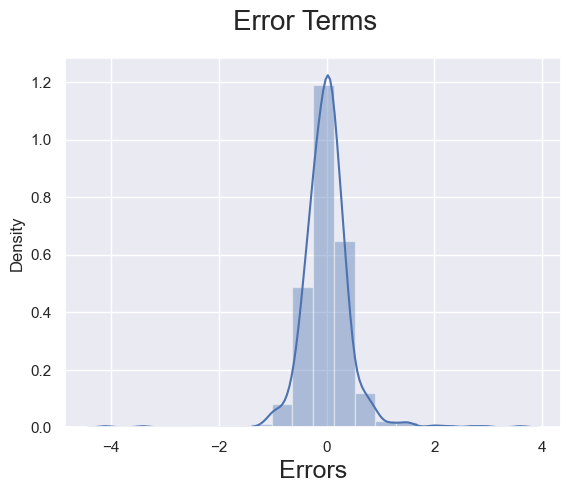

In [2789]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Evaluate R2 of Train model

In [2790]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.8

In [2791]:
r2_train_rfe=r2

In [2792]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

204.53747679284413
0.20033053554637034
0.44758299291457704


In [2793]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

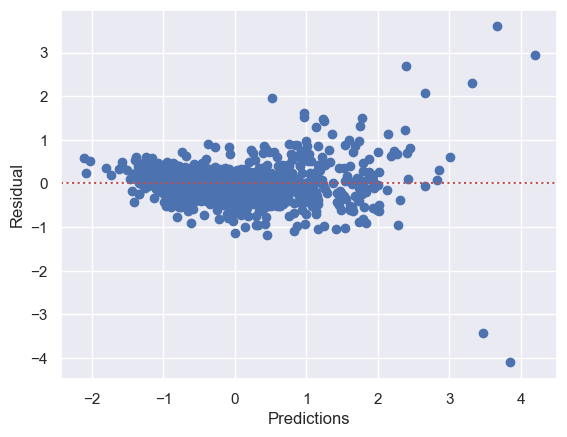

In [2794]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

# Prediction and Evaluation on Test Data

In [2795]:
X_test.shape

(438, 148)

In [2796]:
X_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea   MiscVal    MoSold  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
1436    -0.482282 -0.173195    -1.574844     0.377745     -0.660525   -0.609112  -0.667658 -0.624812     -0.582697      0.748587    0.420867   -0.281532  -0.769869    -0.473033  -1.229516 -0.795529 -0.810589     -0.110778  -1.268092     -0.778198     -0.225306 -1.023721 -0.782546      0.133271     -0.152394    -0.761313     -0.929361   -1.011862    -1.067087     0.226347    0.321299    0.238541   -0.771409    -0.690864      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722 -0.541085 -0.018659              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0                 0                     0                    0                     0                     0                     0   
57       0.842534  0.114799     0.657459    -0.483986      0.934135   -0.609112   1.052544  0.596918     -0.582697     -1.166048   -0.996087   -0.281532   0.667564    -0.483360   0.937599 -0.806680  1.148506     -0.110778   0.410443     -0.778198     -0.225306  0.799002  1.187312      0.133271     -0.152394     0.720710      0.267875   -1.011862    -1.067087     0.294246    0.321299    0.409443   -0.771409     0.362909      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722  0.614990 -1.152815              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0                 0                     0                    0                     0                     0                     1   
780     -0.345232 -0.295688     0.657459    -0.483986      0.547551   -0.378003  -0.667658  0.596918     -0.582697     -1.166048   -0.996087   -0.281532   1.553042     0.489962  -0.145959  0.288934 -0.810589     -0.110778  -0.505300     -0.778198     -0.225306  0.799002 -0.782546      0.133271     -0.152394    -0.761313     -0.330743    0.548686     0.624291     0.273876    0.321299   -0.343449    0.956863    -0.374732      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722 -0.155727 -0.819240              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0                 1                     0                    0                     0                     0                     0   
382      0.385701 -0.146519     0.657459    -0

In [2797]:
y_test.head()

1436   -0.764598
57      0.182784
780    -0.072760
382     0.394699
1170   -0.135088
Name: SalePrice, dtype: float64

In [2798]:
df_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea   MiscVal    MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
1436    -0.482282 -0.173195    -1.574844     0.377745     -0.660525   -0.609112  -0.667658 -0.624812     -0.582697      0.748587    0.420867   -0.281532  -0.769869    -0.473033  -1.229516 -0.795529 -0.810589     -0.110778  -1.268092     -0.778198     -0.225306 -1.023721 -0.782546      0.133271     -0.152394    -0.761313     -0.929361   -1.011862    -1.067087     0.226347    0.321299    0.238541   -0.771409    -0.690864      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722 -0.541085  -0.764598 -0.018659              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0                 0                     0                    0                     0                     0                     0   
57       0.842534  0.114799     0.657459    -0.483986      0.934135   -0.609112   1.052544  0.596918     -0.582697     -1.166048   -0.996087   -0.281532   0.667564    -0.483360   0.937599 -0.806680  1.148506     -0.110778   0.410443     -0.778198     -0.225306  0.799002  1.187312      0.133271     -0.152394     0.720710      0.267875   -1.011862    -1.067087     0.294246    0.321299    0.409443   -0.771409     0.362909      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722  0.614990   0.182784 -1.152815              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0                 0                     0                    0                     0                     0                     1   
780     -0.345232 -0.295688     0.657459    -0.483986      0.547551   -0.378003  -0.667658  0.596918     -0.582697     -1.166048   -0.996087   -0.281532   1.553042     0.489962  -0.145959  0.288934 -0.810589     -0.110778  -0.505300     -0.778198     -0.225306  0.799002 -0.782546      0.133271     -0.152394    -0.761313     -0.330743    0.548686     0.624291     0.273876    0.321299   -0.343449    0.956863    -0.374732      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722 -0.155727  -0.072760 -0.819240              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0                 1                     0                    0                     0                     0                     0   
38

In [2799]:
X_test_rfe15 = sm.add_constant(X_test)

In [2800]:
X_test_rfe15.shape

(438, 149)

In [2801]:
X_test_rfe15.head()

const  LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea   MiscVal    MoSold  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
1436    1.0    -0.482282 -0.173195    -1.574844     0.377745     -0.660525   -0.609112  -0.667658 -0.624812     -0.582697      0.748587    0.420867   -0.281532  -0.769869    -0.473033  -1.229516 -0.795529 -0.810589     -0.110778  -1.268092     -0.778198     -0.225306 -1.023721 -0.782546      0.133271     -0.152394    -0.761313     -0.929361   -1.011862    -1.067087     0.226347    0.321299    0.238541   -0.771409    -0.690864      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722 -0.541085 -0.018659              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0                 0                     0                    0                     0                     0                     0   
57      1.0     0.842534  0.114799     0.657459    -0.483986      0.934135   -0.609112   1.052544  0.596918     -0.582697     -1.166048   -0.996087   -0.281532   0.667564    -0.483360   0.937599 -0.806680  1.148506     -0.110778   0.410443     -0.778198     -0.225306  0.799002  1.187312      0.133271     -0.152394     0.720710      0.267875   -1.011862    -1.067087     0.294246    0.321299    0.409443   -0.771409     0.362909      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722  0.614990 -1.152815              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0                 0                     0                    0                     0                     0                     1   
780     1.0    -0.345232 -0.295688     0.657459    -0.483986      0.547551   -0.378003  -0.667658  0.596918     -0.582697     -1.166048   -0.996087   -0.281532   1.553042     0.489962  -0.145959  0.288934 -0.810589     -0.110778  -0.505300     -0.778198     -0.225306  0.799002 -0.782546      0.133271     -0.152394    -0.761313     -0.330743    0.548686     0.624291     0.273876    0.321299   -0.343449    0.956863    -0.374732      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722 -0.155727 -0.819240              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0                 1                     0                    0                     0                     0                     0   
382     1.0     0.

In [2802]:
X_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea   MiscVal    MoSold  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
1436    -0.482282 -0.173195    -1.574844     0.377745     -0.660525   -0.609112  -0.667658 -0.624812     -0.582697      0.748587    0.420867   -0.281532  -0.769869    -0.473033  -1.229516 -0.795529 -0.810589     -0.110778  -1.268092     -0.778198     -0.225306 -1.023721 -0.782546      0.133271     -0.152394    -0.761313     -0.929361   -1.011862    -1.067087     0.226347    0.321299    0.238541   -0.771409    -0.690864      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722 -0.541085 -0.018659              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0                 0                     0                    0                     0                     0                     0   
57       0.842534  0.114799     0.657459    -0.483986      0.934135   -0.609112   1.052544  0.596918     -0.582697     -1.166048   -0.996087   -0.281532   0.667564    -0.483360   0.937599 -0.806680  1.148506     -0.110778   0.410443     -0.778198     -0.225306  0.799002  1.187312      0.133271     -0.152394     0.720710      0.267875   -1.011862    -1.067087     0.294246    0.321299    0.409443   -0.771409     0.362909      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722  0.614990 -1.152815              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0                 0                     0                    0                     0                     0                     1   
780     -0.345232 -0.295688     0.657459    -0.483986      0.547551   -0.378003  -0.667658  0.596918     -0.582697     -1.166048   -0.996087   -0.281532   1.553042     0.489962  -0.145959  0.288934 -0.810589     -0.110778  -0.505300     -0.778198     -0.225306  0.799002 -0.782546      0.133271     -0.152394    -0.761313     -0.330743    0.548686     0.624291     0.273876    0.321299   -0.343449    0.956863    -0.374732      -0.336016  -0.105612    -0.267159  -0.082098 -0.155722 -0.155727 -0.819240              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0                 1                     0                    0                     0                     0                     0   
382      0.385701 -0.146519     0.657459    -0

In [2803]:
X_train_rfe15.columns

Index(['const', 'OverallQual', '1stFlrSF', 'MSSubClass_85', 'MSSubClass_160', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_AsphShn', 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd', 'GarageType_NA', 'GarageFinish_Unf', '2ndFlrSF', 'LotConfig_FR3'], dtype='object')

In [2804]:
X_train_rfe15_new=X_train_rfe15.drop(['const'], axis=1)

In [2805]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe15_new.columns]

In [2806]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [2807]:
y_pred = lm15.predict(X_test_new)

In [2808]:
#y_test,y_pred

In [2809]:
#evalate model on test data set
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.78

In [2810]:
r2_test_rfe=r2

In [2811]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

95.79626840862383
0.21871294157220053
0.4676675545429686


In [2812]:
rmse_test_rfe=rmse

Text(0, 0.5, 'y_pred')

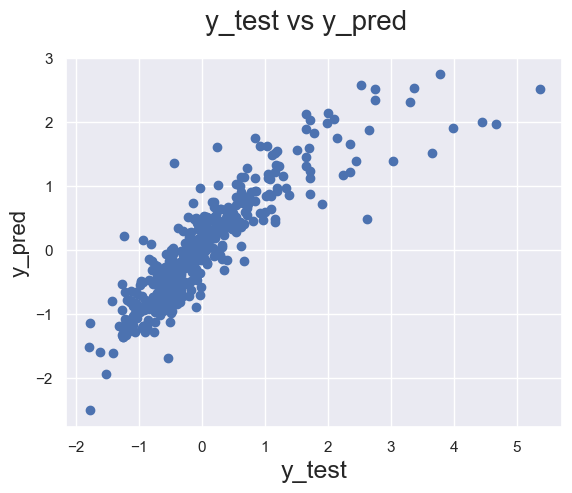

In [2813]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

# 3.3 Ridge Regression

In [2814]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2815]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [2816]:
optval_ridge=model_cv.best_params_

In [2817]:
#Fitting Ridge model for alpha = 50 and printing coefficients which have been penalised
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-5.86326818e-03  4.51102584e-02  1.96705705e-01  5.76990277e-02
  3.04339469e-03  7.84138192e-02  6.98638431e-02  5.38865583e-02
  9.54839302e-02  3.98176654e-02  7.60268617e-03 -5.33033925e-03
 -3.02845859e-03  2.75585329e-03  5.23304101e-03  9.12530454e-02
  1.20116601e-01 -1.34530440e-02  1.65328640e-01  4.69595773e-02
  5.40006849e-03  4.02768715e-02  2.35346833e-02 -1.60621880e-02
 -4.99506067e-02  7.94276320e-02  4.76963368e-02  1.71531908e-02
  3.07194310e-02 -4.42627096e-02  1.03119289e-01  2.94375387e-02
  1.91410971e-02 -9.02295823e-03  4.30621115e-03  1.89779891e-02
  1.51810293e-02 -9.30427895e-03  5.96264642e-04 -2.19186703e-03
 -3.65542136e-02 -6.17479703e-03 -5.27668183e-04  8.17241854e-03
  2.47162180e-02  8.93443320e-03  9.41912590e-03 -5.51095632e-03
 -2.67744915e-02 -1.18551525e-02 -9.08641140e-03 -1.14649833e-01
 -9.03400383e-02 -1.09876978e-02 -2.62426996e-02  2.27534026e-02
  1.55879790e-02  5.08520791e-02 -5.71108067e-02  1.37548409e-02
 -6.83051049e-02  1.61605

In [2818]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_rg = ridge.predict(X_train)
y_pred_test_rg = ridge.predict(X_test)


r2_train_rg = r2_score(y_train, y_pred_train_rg)
#print(r2_train_rg)

r2_test_rg = r2_score(y_test, y_pred_test_rg)
#print(r2_test_rg)

mse_train_rg = mean_squared_error(y_train, y_pred_train_rg)
rmse_train_rg = mse_train_rg**0.5


mse_test_rg = mean_squared_error(y_test, y_pred_test_rg)
rmse_test_rg = mse_test_rg**0.5

print(f' r-squared train: {r2_train_rg} \n r-squared test: {r2_test_rg}\n root mean squared error test: {rmse_train_rg} \n  root mean squared error test: {rmse_test_rg}')


 r-squared train: 0.8513629340723866 
 r-squared test: 0.8547411810260164
 root mean squared error test: 0.3855347791414068 
  root mean squared error test: 0.3811283497379638


# 3.4 Lasso Regression


In [2819]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2820]:
GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2821]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [2822]:
optval_lasso=model_cv.best_params_

In [2823]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [2824]:
lasso.coef_

array([-0.0259332 ,  0.05127674,  0.19657449,  0.05692101,  0.00192695,
        0.05497993,  0.04662814,  0.05997209,  0.10946487,  0.03871163,
        0.        , -0.00835901, -0.00190494, -0.00284465,  0.0030326 ,
        0.        ,  0.10351024, -0.01950621,  0.28760573,  0.05417814,
        0.01682598,  0.03826366,  0.01964786, -0.02785564, -0.05079831,
        0.0721508 ,  0.03618333,  0.01698209,  0.01669393, -0.04033795,
        0.11428341, -0.00418592,  0.01656872, -0.00683419,  0.00295324,
        0.02039775,  0.01831555, -0.00067823,  0.        , -0.00581293,
       -0.0428567 , -0.00496712, -0.        ,  0.        ,  0.09058856,
       -0.        ,  0.        , -0.        ,  0.02071193,  0.        ,
       -0.        , -0.32919588, -0.24226648, -0.        , -0.01153247,
        0.        ,  0.03061752,  0.05793183, -0.        ,  0.        ,
       -0.24599137,  0.01715329,  0.1079348 , -0.11633484, -0.        ,
        0.00387234, -0.        ,  0.01132729,  0.06157856,  0.01

In [2825]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_ls = lasso.predict(X_train)
y_pred_test_ls = lasso.predict(X_test)


r2_train_ls = r2_score(y_train, y_pred_train_ls)
#print(r2_train_ls)


r2_test_ls = r2_score(y_test, y_pred_test_ls)
#print(r2_test_ls)


mse_train_ls = mean_squared_error(y_train, y_pred_train_ls)
rmse_train_ls = mse_train_ls**0.5


rmse_test_ls = mean_squared_error(y_test, y_pred_test_ls)
rmse_test_ls = mse_test_ls**0.5

print(f' r-squared train: {r2_train_ls} \n r-squared test: {r2_test_ls}\n root mean squared error test: {rmse_train_ls} \n  root mean squared error test: {rmse_test_ls}')


 r-squared train: 0.8698044326726775 
 r-squared test: 0.8584596640003013
 root mean squared error test: 0.3608262287131058 
  root mean squared error test: 0.37621846844579376


# Compare Ridge and Lasso

In [2826]:
print("Number of features used(Ridge):", np.sum(ridge.coef_!=0))
print("Number of features used(Lasso):", np.sum(lasso.coef_!=0))

Number of features used(Ridge): 147
Number of features used(Lasso): 92


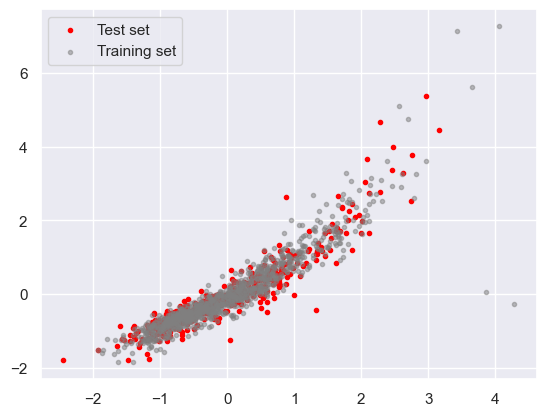

In [2827]:
# Plot the linear model
plt.scatter(y_pred_test_rg, y_test, color='red', marker='.', label = "Test set")
plt.scatter(y_pred_train_rg, y_train, color='grey', marker='.', label = "Training set", alpha=.50)
plt.legend()
plt.show()

# 3.5 Top Features that describe housing price

# Based on Ridge Regression

In [2828]:
a = pd.DataFrame(X_train.columns)
b = pd.DataFrame(ridge.coef_)

In [2829]:
coefficients = pd.concat([a,b], axis=1)
coefficients.columns = ['Features','Coefficient']

In [2830]:
coefficients.sort_values(by='Coefficient', ascending=False).head(10)

Features  Coefficient
2            OverallQual     0.196706
80  Neighborhood_NoRidge     0.192311
81  Neighborhood_NridgHt     0.174011
18             GrLivArea     0.165329
91     HouseStyle_1Story     0.141040
16              2ndFlrSF     0.120117
30            GarageCars     0.103119
8           BsmtExposure     0.095484
15              1stFlrSF     0.091253
71  Neighborhood_Crawfor     0.089360

# Based on Lasso Regression

In [2831]:
a = pd.DataFrame(X_train.columns)
b = pd.DataFrame(lasso.coef_)

In [2832]:
coefficients = pd.concat([a,b], axis=1)
coefficients.columns = ['Features','Coefficient']

In [2833]:
coefficients.sort_values(by='Coefficient', ascending=False).head(10)

Features  Coefficient
81   Neighborhood_NridgHt     0.602054
80   Neighborhood_NoRidge     0.595412
87   Neighborhood_StoneBr     0.330668
91      HouseStyle_1Story     0.311616
86   Neighborhood_Somerst     0.309355
71   Neighborhood_Crawfor     0.299277
18              GrLivArea     0.287606
122   Exterior2nd_ImStucc     0.223743
2             OverallQual     0.196574
104   Exterior1st_BrkFace     0.183175

# 3.6 Compare results from Linear Reg, Linear Reg(RFE), Ridge and Lasso

In [2834]:
compare = pd.DataFrame([[r2_train_lr, r2_test_lr, rmse_test_lr],[r2_train_rfe, r2_test_rfe, rmse_test_rfe], 
             [r2_train_rg, r2_test_rg, rmse_test_rg], 
            [r2_train_ls, r2_test_ls, rmse_test_ls]],
            columns = ['R2 score(Train)', 'R2 score(Test)', 'RMSE'], 
            index = ['Linear Regression','Linear Regression (RFE)' 
                     ,'Ridge Regression', 'Lasso Regression'])

compare

R2 score(Train)  R2 score(Test)      RMSE
Linear Regression               0.876367        0.849595  0.387821
Linear Regression (RFE)         0.799669        0.781287  0.467668
Ridge Regression                0.851363        0.854741  0.381128
Lasso Regression                0.869804        0.858460  0.376218

# 4. CONCLUSION

Based on above comparison of various models, we see that Lasso Regression has the best R Squared values and RMSE. We will pick the features based on Lasso regression. 
The top features that will help in predicting the house prices are as follows: 
    
    Features and respective Coefficients:
Neighborhood_NridgHt,0.602054 ;
Neighborhood_NoRidge,0.595412 ;
Neighborhood_StoneBr,0.330668 ; 
HouseStyle_1Story,0.311616;
Neighborhood_Somerst,0.309355;
Neighborhood_Crawfor,0.299277;
GrLivArea,0.287606;
Exterior2nd_ImStucc,0.223743;
OverallQual,0.196574;
Exterior1st_BrkFace,0.18317

# Problem Statement - Part II




# Question 1 - What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? !

In [2835]:
#Fitting Ridge model for alpha = 100(double value) and printing coefficients 
alpha = 100
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
print(ridge2.coef_)

[ 2.30553618e-04  4.38278419e-02  1.84294210e-01  5.42408231e-02
  8.10093361e-03  7.74722559e-02  7.48817257e-02  4.95323508e-02
  8.79934837e-02  3.92124507e-02  1.55613940e-02 -2.33208075e-03
  6.30289686e-04  1.55060473e-02  8.60432193e-03  9.18808719e-02
  9.77679735e-02 -1.18049069e-02  1.47661892e-01  4.16068275e-02
  2.71306696e-03  4.17988520e-02  2.52541182e-02 -1.14178682e-02
 -4.83415550e-02  8.12348922e-02  5.17388029e-02  2.06623142e-02
  3.61937121e-02 -4.02551225e-02  9.22491543e-02  4.14013508e-02
  2.14911676e-02 -7.61582000e-03  3.12012532e-03  1.76489818e-02
  1.52443387e-02 -1.13925761e-02  8.63256119e-04 -5.22654362e-04
 -3.26235898e-02 -3.92421492e-03  8.70977053e-04  4.19716285e-03
  1.65276986e-02  9.97918693e-03  7.17665893e-03 -2.26448417e-03
 -2.60069095e-02 -1.04499359e-02 -6.25926648e-03 -6.51445627e-02
 -5.71687269e-02 -5.26955646e-03 -1.66835019e-02  1.54379242e-02
  8.05203651e-03  4.13627269e-02 -4.91320698e-02  1.01128042e-02
 -4.00952023e-02 -4.97371

In [2836]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_rg2 = ridge2.predict(X_train)
y_pred_test_rg2 = ridge2.predict(X_test)


r2_train_rg2 = r2_score(y_train, y_pred_train_rg2)
#print(r2_train_rg)

r2_test_rg2 = r2_score(y_test, y_pred_test_rg2)
#print(r2_test_rg)

mse_train_rg2 = mean_squared_error(y_train, y_pred_train_rg2)
rmse_train_rg2 = mse_train_rg**0.5


mse_test_rg2 = mean_squared_error(y_test, y_pred_test_rg2)
rmse_test_rg2 = mse_test_rg2**0.5

print(f' r-squared train: {r2_train_rg2} \n r-squared test: {r2_test_rg2}\n root mean squared error test: {rmse_train_rg2} \n  root mean squared error test: {rmse_test_rg2}')


 r-squared train: 0.8414777048448685 
 r-squared test: 0.8519529451856476
 root mean squared error test: 0.3855347791414068 
  root mean squared error test: 0.38476883295603914


Top features based on changed Ridge aplha 

In [2837]:
a = pd.DataFrame(X_train.columns)
b = pd.DataFrame(ridge2.coef_)

In [2838]:
coefficients = pd.concat([a,b], axis=1)
coefficients.columns = ['Features','Coefficient']

In [2839]:
coefficients.sort_values(by='Coefficient', ascending=False).head(10)

Features  Coefficient
2            OverallQual     0.184294
18             GrLivArea     0.147662
80  Neighborhood_NoRidge     0.123972
81  Neighborhood_NridgHt     0.106785
16              2ndFlrSF     0.097768
91     HouseStyle_1Story     0.093152
30            GarageCars     0.092249
15              1stFlrSF     0.091881
8           BsmtExposure     0.087993
25           KitchenQual     0.081235

In [2840]:
#Fitting Lasso model for alpha = 0.002 and printing coefficients 

alpha =0.002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [2841]:
lasso2.coef_

array([-0.02250001,  0.0472354 ,  0.204301  ,  0.05751272,  0.        ,
        0.06032144,  0.05200369,  0.0445133 ,  0.10619218,  0.03699114,
        0.        , -0.00570099, -0.00212565, -0.        ,  0.00274143,
        0.        ,  0.07277535, -0.01944901,  0.2984781 ,  0.05249317,
        0.01306307,  0.03307282,  0.01889868, -0.02461336, -0.04965877,
        0.07650647,  0.03181029,  0.01679846,  0.01895411, -0.0359298 ,
        0.11227416, -0.        ,  0.01584861, -0.00649739,  0.        ,
        0.0184066 ,  0.01752907, -0.00200351,  0.        , -0.00343664,
       -0.04280366, -0.        , -0.        ,  0.        ,  0.05897218,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.26939627, -0.20223349, -0.        , -0.        ,
        0.        ,  0.        ,  0.03435572, -0.01779416,  0.        ,
       -0.1561902 ,  0.00471624,  0.08746163, -0.0714784 , -0.        ,
        0.        , -0.        ,  0.        ,  0.02865676,  0.  

Top features based on Lasso changed alpha

In [2842]:
a = pd.DataFrame(X_train.columns)
b = pd.DataFrame(lasso2.coef_)

In [2843]:
coefficients = pd.concat([a,b], axis=1)
coefficients.columns = ['Features','Coefficient']

In [2844]:
coefficients.sort_values(by='Coefficient', ascending=False).head(10)

Features  Coefficient
80   Neighborhood_NoRidge     0.562109
81   Neighborhood_NridgHt     0.520797
18              GrLivArea     0.298478
91      HouseStyle_1Story     0.262482
71   Neighborhood_Crawfor     0.247066
86   Neighborhood_Somerst     0.242775
2             OverallQual     0.204301
87   Neighborhood_StoneBr     0.190948
104   Exterior1st_BrkFace     0.149129
30             GarageCars     0.112274

In [2845]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_ls2 = lasso2.predict(X_train)
y_pred_test_ls2 = lasso2.predict(X_test)


r2_train_ls2 = r2_score(y_train, y_pred_train_ls2)
#print(r2_train_ls)


r2_test_ls2 = r2_score(y_test, y_pred_test_ls2)
#print(r2_test_ls)


mse_train_ls2 = mean_squared_error(y_train, y_pred_train_ls2)
rmse_train_ls2 = mse_train_ls2**0.5


mse_test_ls2 = mean_squared_error(y_test, y_pred_test_ls2)
rmse_test_ls2 = mse_test_ls2**0.5

print(f' r-squared train: {r2_train_ls2} \n r-squared test: {r2_test_ls2}\n root mean squared error test: {rmse_train_ls2} \n  root mean squared error test: {rmse_test_ls2}')


 r-squared train: 0.8642278575937223 
 r-squared test: 0.858475204939785
 root mean squared error test: 0.3684727159591028 
  root mean squared error test: 0.376197813736623


# Comparing model results after changed alphas

In [2846]:
compare = pd.DataFrame([ [r2_train_rg, r2_test_rg, rmse_test_rg], 
            [r2_train_ls, r2_test_ls, rmse_test_ls],
             [r2_train_rg2, r2_test_rg2, rmse_test_rg2], 
            [r2_train_ls2, r2_test_ls2, rmse_test_ls2]],
            columns = ['R2 score(Train)', 'R2 score(Test)', 'RMSE'], 
            index = [ 'Ridge Regression', 'Lasso Regression','Ridge Regression 2', 'Lasso Regression 2'])

compare

R2 score(Train)  R2 score(Test)      RMSE
Ridge Regression           0.851363        0.854741  0.381128
Lasso Regression           0.869804        0.858460  0.376218
Ridge Regression 2         0.841478        0.851953  0.384769
Lasso Regression 2         0.864228        0.858475  0.376198

Comparing top features 

In [2847]:
compare_df = pd.DataFrame(index=X_train.columns)
compare_df.rows = X_train.columns

compare_df['Linear'] = lr.params
compare_df['Linear RFE'] = lm15.params
compare_df['Ridge'] = ridge.coef_
compare_df['Lasso'] = lasso.coef_
compare_df.sort_values(by='Lasso', ascending=False)

Linear  Linear RFE     Ridge     Lasso
Neighborhood_NridgHt  7.863948e-01    0.697663  0.174011  0.602054
Neighborhood_NoRidge  7.225916e-01    0.834484  0.192311  0.595412
Neighborhood_StoneBr  5.732714e-01         NaN  0.035521  0.330668
HouseStyle_1Story     4.785077e-01         NaN  0.141040  0.311616
Neighborhood_Somerst  4.781725e-01    0.351921  0.061514  0.309355
Neighborhood_Crawfor  4.266414e-01    0.383724  0.089360  0.299277
GrLivArea             2.246809e-01         NaN  0.165329  0.287606
Exterior2nd_ImStucc   7.569413e-01    0.448453  0.054665  0.223743
OverallQual           1.782245e-01    0.363037  0.196706  0.196574
Exterior1st_BrkFace  -1.188234e-01         NaN  0.071645  0.183175
Foundation_Slab       3.412600e-01         NaN  0.049215  0.134528
Neighborhood_Veenker  3.080197e-01    0.530350  0.024046  0.132257
GarageCars            1.290640e-01         NaN  0.103119  0.114283
BsmtExposure          1.137384e-01         NaN  0.095484  0.109465
LotConfig_CulDSac     1.082792e-01    0.219766  0.069139  0.107935
2ndFlrSF              2.311690e-01    0.228313  0.120117  0.103510
HouseStyle_1.5Unf     5.624216e-01         NaN  0.017857  0.100402
MSSubClass_50         1.388997e-01         NaN  0.024716  0.090589
MasVnrType_None       1.515955e-01         NaN  0.070532  0.085678
GarageType_Attchd     2.641306e-01         NaN  0.039832  0.076382
KitchenQual           6.425865e-02         NaN  0.079428  0.072151
Neighborhood_BrkSide  1.412004e-01         NaN  0.037608  0.061579
BsmtQual              8.868351e-02         NaN  0.053887  0.059972
MSZoning_RL           3.443371e-01         NaN  0.050852  0.057932
OverallCond           5.311274e-02         NaN  0.057699  0.056921
MasVnrArea            3.897376e-02         NaN  0.078414  0.054980
BsmtFullBath          5.701751e-02         NaN  0.046960  0.054178
LotArea               5.954834e-02         NaN  0.045110  0.051277
ExterQual             3.871737e-02         NaN  0.069864  0.046628
GarageType_Detchd     2.556200e-01         NaN  0.002109  0.045411
BsmtFinType1          3.384146e-02         NaN  0.039818  0.038712
FullBath              4.311799e-02         NaN  0.040277  0.038264
TotRmsAbvGrd          3.792566e-02         NaN  0.047696  0.036183
MSZoning_RH           4.165210e-01         NaN  0.015588  0.030618
Foundation_CBlock     1.079872e-01         NaN  0.006531  0.030395
Exterior1st_WdShing  -1.520260e-01         NaN  0.000114  0.029873
Exterior2nd_VinylSd   2.883874e-01    0.150742  0.021397  0.028280
MSSubClass_80        -2.279236e-02         NaN -0.026774  0.020712
3SsnPorch             2.464624e-02         NaN  0.018978  0.020398
HalfBath              2.350447e-02         NaN  0.023535  0.019648
ScreenPorch           1.927455e-02         NaN  0.015181  0.018316
RoofStyle_Hip         1.383824e-01         NaN  0.025740  0.017302
LotShape_Reg          3.889112e-02         NaN  0.001616  0.017153
Fireplaces            1.487767e-02         NaN  0.017153  0.016982
BsmtHalfBath          2.120018e-02         NaN  0.005400  0.016826
FireplaceQu           1.629387e-02         NaN  0.030719  0.016694
WoodDeckSF            1.528593e-02         NaN  0.019141  0.016569
Neighborhood_ClearCr  1.328812e-01    0.415175  0.016341  0.016567
Exterior2nd_CmentBd   6.991283e-01         NaN  0.018928  0.011950
Neighborhood_BrDale   2.623653e-01         NaN -0.001580  0.011327
LotConfig_Inside     -3.867170e-03         NaN  0.004074  0.003872
HeatingQC             4.164219e-03         NaN  0.005233  0.003033
EnclosedPorch         5.664021e-03         NaN  0.004306  0.002953
MasVnrType_BrkFace    9.969619e-02         NaN -0.023545  0.002765
YearRemodAdd          8.178006e-03         NaN  0.003043  0.001927
HouseStyle_2.5Fin    -4.666887e-01   -0.245335 -0.008955 -0.000000
Exterior2nd_AsphShn   3.995027e-02   -0.682382 -0.001638 -0.000000
Exterior2nd_CBlock   -9.822832e-03         NaN  0.001591  0.000000
Neighborhood_Timber   4.796703e-02         NaN -0.035411 -0.000000
Exterior

Adding doubled alpha models to the comparison

In [2848]:

compare_df['Ridge2'] = ridge2.coef_
compare_df['Lasso2'] = lasso2.coef_
compare_df.sort_values(by='Lasso', ascending=False)

Linear  Linear RFE     Ridge     Lasso    Ridge2    Lasso2
Neighborhood_NridgHt  7.863948e-01    0.697663  0.174011  0.602054  0.106785  0.520797
Neighborhood_NoRidge  7.225916e-01    0.834484  0.192311  0.595412  0.123972  0.562109
Neighborhood_StoneBr  5.732714e-01         NaN  0.035521  0.330668  0.019900  0.190948
HouseStyle_1Story     4.785077e-01         NaN  0.141040  0.311616  0.093152  0.262482
Neighborhood_Somerst  4.781725e-01    0.351921  0.061514  0.309355  0.037246  0.242775
Neighborhood_Crawfor  4.266414e-01    0.383724  0.089360  0.299277  0.056459  0.247066
GrLivArea             2.246809e-01         NaN  0.165329  0.287606  0.147662  0.298478
Exterior2nd_ImStucc   7.569413e-01    0.448453  0.054665  0.223743  0.030466  0.074155
OverallQual           1.782245e-01    0.363037  0.196706  0.196574  0.184294  0.204301
Exterior1st_BrkFace  -1.188234e-01         NaN  0.071645  0.183175  0.047139  0.149129
Foundation_Slab       3.412600e-01         NaN  0.049215  0.134528  0.029087  0.005818
Neighborhood_Veenker  3.080197e-01    0.530350  0.024046  0.132257  0.014221  0.007400
GarageCars            1.290640e-01         NaN  0.103119  0.114283  0.092249  0.112274
BsmtExposure          1.137384e-01         NaN  0.095484  0.109465  0.087993  0.106192
LotConfig_CulDSac     1.082792e-01    0.219766  0.069139  0.107935  0.048192  0.087462
2ndFlrSF              2.311690e-01    0.228313  0.120117  0.103510  0.097768  0.072775
HouseStyle_1.5Unf     5.624216e-01         NaN  0.017857  0.100402  0.008797  0.000000
MSSubClass_50         1.388997e-01         NaN  0.024716  0.090589  0.016528  0.058972
MasVnrType_None       1.515955e-01         NaN  0.070532  0.085678  0.053328  0.094859
GarageType_Attchd     2.641306e-01         NaN  0.039832  0.076382  0.029246  0.043111
KitchenQual           6.425865e-02         NaN  0.079428  0.072151  0.081235  0.076506
Neighborhood_BrkSide  1.412004e-01         NaN  0.037608  0.061579  0.024912  0.028657
BsmtQual              8.868351e-02         NaN  0.053887  0.059972  0.049532  0.044513
MSZoning_RL           3.443371e-01         NaN  0.050852  0.057932  0.041363  0.034356
OverallCond           5.311274e-02         NaN  0.057699  0.056921  0.054241  0.057513
MasVnrArea            3.897376e-02         NaN  0.078414  0.054980  0.077472  0.060321
BsmtFullBath          5.701751e-02         NaN  0.046960  0.054178  0.041607  0.052493
LotArea               5.954834e-02         NaN  0.045110  0.051277  0.043828  0.047235
ExterQual             3.871737e-02         NaN  0.069864  0.046628  0.074882  0.052004
GarageType_Detchd     2.556200e-01         NaN  0.002109  0.045411 -0.009213  0.000000
BsmtFinType1          3.384146e-02         NaN  0.039818  0.038712  0.039212  0.036991
FullBath              4.311799e-02         NaN  0.040277  0.038264  0.041799  0.033073
TotRmsAbvGrd          3.792566e-02         NaN  0.047696  0.036183  0.051739  0.031810
MSZoning_RH           4.165210e-01         NaN  0.015588  0.030618  0.008052  0.000000
Foundation_CBlock     1.079872e-01         NaN  0.006531  0.030395 -0.005207  0.000000
Exterior1st_WdShing  -1.520260e-01         NaN  0.000114  0.029873 -0.001288  0.000000
Exterior2nd_VinylSd   2.883874e-01    0.150742  0.021397  0.028280  0.017880  0.018345
MSSubClass_80        -2.279236e-02         NaN -0.026774  0.020712 -0.026007  0.000000
3SsnPorch             2.464624e-02         NaN  0.018978  0.020398  0.017649  0.018407
HalfBath              2.350447e-02         NaN  0.023535  0.019648  0.025254  0.018899
ScreenPorch           1.927455e-02         NaN  0.015181  0.018316  0.015244  0.017529
RoofStyle_Hip         1.383824e-01         NaN  0.025740  0.017302  0.026915  0.003874
LotShape_Reg          3.889112e-02         NaN  0.001616  0.017153 -0.004974  0.004716
Fireplaces            1.487767e-02         NaN  0.017153  0.016982  0.020662  0.016798
BsmtHalfBath          2.120018e-02         NaN  0.005400  0.016826  0.002713  0.013063
FireplaceQu           1.62

# Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [2849]:
#dropping top 5 features from Lasso 

X_train_ls_q3 = X_train.drop(columns = ['Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'Neighborhood_Somerst'], axis=1)

X_test_ls_q3 = X_test.drop(columns = ['Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'Neighborhood_Somerst'], axis=1)

In [2850]:
X_train_ls_q3.shape,X_test_ls_q3.shape

((1021, 143), (438, 143))

In [2851]:
#Lasso on new data set

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_ls_q3, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2852]:
GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2853]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [2854]:
alpha =0.001

lasso_q3 = Lasso(alpha=alpha)
        
lasso_q3.fit(X_train_ls_q3, y_train) 

Lasso(alpha=0.001)

In [2855]:
y_train_pred_ls_q3 = lasso_q3.predict(X_train_ls_q3)

In [2856]:
y_test_pred_ls_q3 = lasso_q3.predict(X_test_ls_q3)

In [2857]:
r2_train_ls_q3 = r2_score(y_train, y_train_pred_ls_q3)

In [2858]:
y_test.shape,y_test_pred_ls_q3.shape

((438,), (438,))

In [2859]:
r2_test_ls_q3 = r2_score(y_test, y_test_pred_ls_q3)

In [2860]:
mse_test_ls_q3 = mean_squared_error(y_test, y_test_pred_ls_q3)
rmse_test_ls_q3 = mse_test_ls_q3**0.5

print(f' r-squared train: {r2_train_ls_q3} \n r-squared test: {r2_test_ls_q3}\n root mean squared error: {rmse_test_ls_q3}')

 r-squared train: 0.8590325825372329 
 r-squared test: 0.8535432493019665
 root mean squared error: 0.38269668237134413


In [2861]:
col1 = pd.DataFrame(X_train_ls_q3.columns)
col2 = pd.DataFrame(lasso_q3.coef_)

In [2862]:
coefficients = pd.concat([col1,col2], axis=1)
coefficients.columns = ['Features','Coefficient']

coefficients.sort_values(by='Coefficient', ascending=False)

Features  Coefficient
18              GrLivArea     0.314908
117   Exterior2nd_ImStucc     0.294312
2             OverallQual     0.204423
99    Exterior1st_BrkFace     0.190671
131       Foundation_Slab     0.165208
30             GarageCars     0.127561
57            MSZoning_RL     0.109285
127       MasVnrType_None     0.100094
8            BsmtExposure     0.092186
62      LotConfig_CulDSac     0.090043
71   Neighborhood_Crawfor     0.084298
5              MasVnrArea     0.083578
6               ExterQual     0.077438
56            MSZoning_RH     0.072306
25            KitchenQual     0.069342
7                BsmtQual     0.068860
19           BsmtFullBath     0.054385
1                 LotArea     0.051393
134     GarageType_Attchd     0.051075
3             OverallCond     0.049871
9            BsmtFinType1     0.041588
21               FullBath     0.034447
108   Exterior1st_VinylSd     0.031643
94          RoofStyle_Hip     0.030251
28            FireplaceQu     0.029652
16               2ndFlrSF     0.028702
138     GarageType_Detchd     0.021641
26           TotRmsAbvGrd     0.020240
35              3SsnPorch     0.016756
32             WoodDeckSF     0.014426
36            ScreenPorch     0.013282
4            YearRemodAdd     0.012330
22               HalfBath     0.011244
129     Foundation_CBlock     0.009081
20           BsmtHalfBath     0.007014
126    MasVnrType_BrkFace     0.006202
130      Foundation_PConc     0.005365
14              HeatingQC     0.004381
61           LotShape_Reg     0.002948
65       LotConfig_Inside     0.001968
104   Exterior1st_MetalSd     0.001595
34          EnclosedPorch     0.000571
78   Neighborhood_NPkVill    -0.000000
121     Exterior2nd_Stone     0.000000
118   Exterior2nd_MetalSd     0.000000
75   Neighborhood_MeadowV    -0.000000
119     Exterior2nd_Other     0.000000
116   Exterior2nd_HdBoard     0.000000
106     Exterior1st_Stone    -0.000000
115   Exterior2nd_CmentBd     0.000000
114    Exterior2nd_CBlock     0.000000
101   Exterior1st_CemntBd    -0.000000
100    Exterior1st_CBlock     0.000000
98    Exterior1st_BrkComm    -0.000000
97    Exterior1st_AsphShn    -0.000000
96         RoofStyle_Shed    -0.000000
95      RoofStyle_Mansard     0.000000
93      RoofStyle_Gambrel     0.000000
107    Exterior1st_Stucco    -0.000000
87      HouseStyle_2.5Fin    -0.000000
86      HouseStyle_1.5Unf    -0.000000
85   Neighborhood_Veenker    -0.000000
110   Exterior1st_WdShing     0.000000
111   Exterior2nd_AsphShn    -0.000000
112   Exterior2nd_Brk Cmn    -0.000000
113   Exterior2nd_BrkFace     0.000000
123   Exterior2nd_VinylSd     0.000000
133       Foundation_Wood    -0.000000
41          MSSubClass_30     0.000000
43          MSSubClass_45    -0.000000
10             BsmtFinSF1     0.000000
13            TotalBsmtSF    -0.000000
15               1stFlrSF     0.000000
140       GarageFinish_NA     0.000000
139         GarageType_NA     0.000000
27             Fireplaces     0.000000
137    GarageType_CarPort    -0.000000
31             GarageArea     0.000000
38                MiscVal    -0.000000
136    GarageType_BuiltIn    -0.000000
67    Neighborhood_BrDale     0.000000
42          MSSubClass_40    -0.000000
102   Exterior1st_HdBoard    -0.000000
135    GarageType_Basment    -0.000000
46          MSSubClass_70    -0.000000
66   Neighborhood_Blueste    -0.000000
64          LotConfig_FR3    -0.000000
128      MasVnrType_Stone    -0.000000
59           LotShape_IR2     0.000000
55            MSZoning_FV     0.000000
132      Foundation_Stone     0.000000
103   Exterior1st_ImStucc    -0.000000
49          MSSubClass_85     0.000000
48          MSSubClass_80    -0.000000
47          MSSubClass_75    -0.000000
50          MSSubClass_90    -0.001965
109   Exterior1st_Wd Sdng    -0.003586
37               PoolArea    -0.004467
39                 MoSold    -0.005003
11             BsmtFinSF2    -0.008774
33            OpenPorchSF    -0.010538
12              BsmtUnfSF    -0.013052
